In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from random import random
from tqdm import tqdm
import seaborn as sns

#!pip3 install tabulate 
# Tabulate es una libreria para imprimir tablas en consola, habilita df.to_markdown() para incluir las tablas en el informe

Experimentación. Realizar experimentos sobre todas las instancias comparando el modelo propuesto respecto al de la solución actual de la compañía. En cada caso, medir la mejora porcentual obtenida. Sean $z_b$ y $z_g$ el valor de la función objetivo de una solución del modelo para el batching y el de FCFS, respectivamente. definimos la mejora relativa como

$$
    \%\text{gap}= \frac{z_g − z_b}{z_b}
$$

En caso de considerarlo conveniente, pueden agregar otras métricas complementarias (respecto al método o a las soluciones) para el análisis de los resultados.
Sugerencia: se recomienda sistematizar la realización de experimentos, idealmente definiendo
la lista de instancias a considerar y reportando en algún formato conveniente (por ejemplo, csv)
el resumen de los resultados obtenidos, para ser analizados posteriormente.

In [3]:
solutions = pd.read_csv('../output/results.csv')

"Columnas: " + ' | '.join(list(solutions.columns))

'Columnas: filename | n | greedy_cost | min_cost_flow_cost | greedy_time | min_cost_flow_time | priority_cost | priority_time'

In [4]:
solutions["gap"] = (solutions["greedy_cost"] - solutions["min_cost_flow_cost"]) / solutions["min_cost_flow_cost"]
solutions.head()

filename   n  greedy_cost  min_cost_flow_cost  greedy_time  \
0  input/small_0.csv  10         36.9                29.3     0.003834   
1  input/small_1.csv  10         42.4                32.4     0.003625   
2  input/small_2.csv  10         65.6                56.9     0.003375   
3  input/small_3.csv  10         29.5                23.7     0.004042   
4  input/small_4.csv  10         33.9                30.8     0.003750   

   min_cost_flow_time  priority_cost  priority_time       gap  
0            1.278210           30.0       0.072542  0.259386  
1            0.066792           33.0       0.051625  0.308642  
2            0.080667           62.7       0.074875  0.152900  
3            0.082041           24.4       0.074625  0.244726  
4            0.085584           32.2       0.069042  0.100649

In [5]:
# ignore the reg_log column
solutions.describe()

n  greedy_cost  min_cost_flow_cost  greedy_time  \
count   40.000000    40.000000           40.000000    40.000000   
mean   215.000000   696.782500          587.277500     0.466245   
std    187.903412   583.800751          498.484705     0.579288   
min     10.000000    29.500000           23.700000     0.003375   
25%     77.500000   219.875000          184.925000     0.046980   
50%    175.000000   572.800000          471.850000     0.227646   
75%    312.500000  1088.700000          912.875000     0.605584   
max    500.000000  1737.400000         1521.800000     1.826960   

       min_cost_flow_time  priority_cost  priority_time        gap  
count           40.000000      40.000000      40.000000  40.000000  
mean            24.306557     630.085000      31.161884   0.191644  
std             31.888349     530.187328      42.366877   0.059078  
min              0.063666      24.400000       0.051625   0.073239  
25%              1.937993     200.475000       1.638575   0.154794  
50%              9.322780     520.450000       9.647795   0.178846  
75%             30.937775     991.000000      39.802275   0.241455  
max             98.613500    1627.800000     137.926000   0.308642

In [6]:
# output as latex table
#print(solutions.drop(columns=['priority_time', 'priority_cost']).describe().to_markdown())
solutions.drop(columns=['priority_time', 'priority_cost']).describe()

n  greedy_cost  min_cost_flow_cost  greedy_time  \
count   40.000000    40.000000           40.000000    40.000000   
mean   215.000000   696.782500          587.277500     0.466245   
std    187.903412   583.800751          498.484705     0.579288   
min     10.000000    29.500000           23.700000     0.003375   
25%     77.500000   219.875000          184.925000     0.046980   
50%    175.000000   572.800000          471.850000     0.227646   
75%    312.500000  1088.700000          912.875000     0.605584   
max    500.000000  1737.400000         1521.800000     1.826960   

       min_cost_flow_time        gap  
count           40.000000  40.000000  
mean            24.306557   0.191644  
std             31.888349   0.059078  
min              0.063666   0.073239  
25%              1.937993   0.154794  
50%              9.322780   0.178846  
75%             30.937775   0.241455  
max             98.613500   0.308642

In [7]:
#print(solutions.drop(columns=['gap', 'priority_cost', 'priority_time']).describe().to_markdown())
solutions.drop(columns=['gap', 'priority_cost', 'priority_time']).describe()

n  greedy_cost  min_cost_flow_cost  greedy_time  \
count   40.000000    40.000000           40.000000    40.000000   
mean   215.000000   696.782500          587.277500     0.466245   
std    187.903412   583.800751          498.484705     0.579288   
min     10.000000    29.500000           23.700000     0.003375   
25%     77.500000   219.875000          184.925000     0.046980   
50%    175.000000   572.800000          471.850000     0.227646   
75%    312.500000  1088.700000          912.875000     0.605584   
max    500.000000  1737.400000         1521.800000     1.826960   

       min_cost_flow_time  
count           40.000000  
mean            24.306557  
std             31.888349  
min              0.063666  
25%              1.937993  
50%              9.322780  
75%             30.937775  
max             98.613500

In [8]:
gaps = solutions[['n', 'gap', "greedy_cost", "min_cost_flow_cost"]]
#print(gaps.groupby('n')[["greedy_cost", "min_cost_flow_cost", 'gap']].mean().to_markdown())
gaps.groupby('n')[["greedy_cost", "min_cost_flow_cost", 'gap']].mean()

greedy_cost  min_cost_flow_cost       gap
n                                             
10         46.93               40.06  0.177322
100       337.31              280.63  0.205883
250       849.60              701.60  0.212157
500      1553.29             1326.82  0.171215

In [9]:
#print(gaps.groupby('n')['gap'].describe().to_markdown())
gaps.groupby('n')['gap'].describe()

count      mean       std       min       25%       50%       75%  \
n                                                                        
10    10.0  0.177322  0.076926  0.073239  0.113712  0.169066  0.233651   
100   10.0  0.205883  0.057421  0.104009  0.171945  0.194773  0.249033   
250   10.0  0.212157  0.059926  0.144362  0.157622  0.201565  0.267717   
500   10.0  0.171215  0.030561  0.135713  0.143316  0.170003  0.198171   

          max  
n              
10   0.308642  
100  0.287764  
250  0.299222  
500  0.216486

In [10]:
avg_gap = solutions["gap"].mean()
avg_gap

0.19164428484224535

In [ ]:
!mkdir ../output/figures

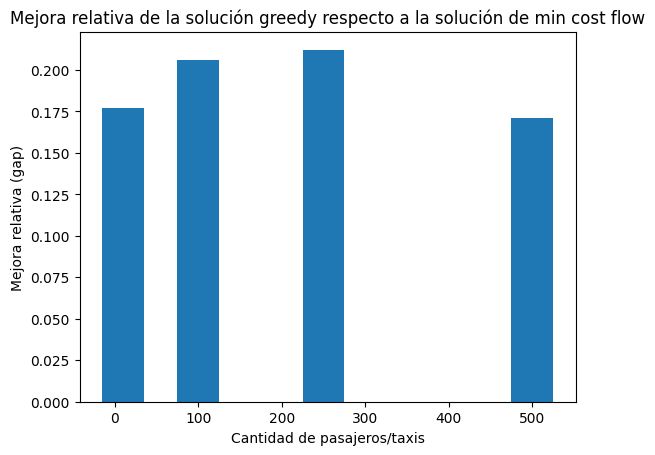

In [11]:
# Plot gap avg vs. n

avg_10  = solutions[solutions["n"] == 10]["gap"].mean()
avg_100 = solutions[solutions["n"] == 100]["gap"].mean()
avg_250 = solutions[solutions["n"] == 250]["gap"].mean()
avg_500 = solutions[solutions["n"] == 500]["gap"].mean()

# Plot gap avg vs. n
# Bar plot

ns = [10, 100, 250, 500]
avg_gaps = [avg_10, avg_100, avg_250, avg_500]

plt.bar(ns, avg_gaps, width=50)
plt.xlabel("Cantidad de pasajeros/taxis")
plt.ylabel("Mejora relativa (gap)")
plt.title("Mejora relativa de la solución greedy respecto a la solución de min cost flow")



plt.savefig("../output/figures/greedy_vs_batching.png")

plt.show()

/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


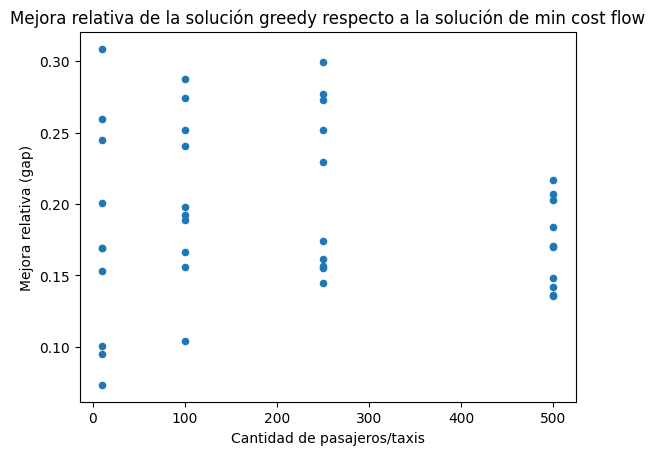

In [12]:
fig, ax = plt.subplots()

_ = solutions.plot.scatter(x="n", y="gap", 
    title="Mejora relativa de la solución greedy respecto a la solución de min cost flow",
    ax=ax
)

ax.set_xlabel("Cantidad de pasajeros/taxis")
ax.set_ylabel("Mejora relativa (gap)")

plt.savefig("../output/figures/greedy_vs_batching_scatter.png")

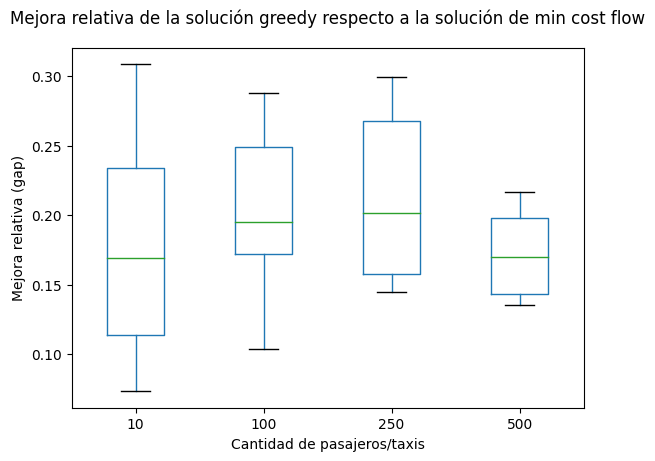

In [13]:
fig, ax = plt.subplots()

# Boxplot
solutions.boxplot(column="gap", by="n", ax=ax,
    grid=False
)

#ax.set_title("Mejora relativa de la solución greedy respecto a la solución de min cost flow")
ax.set_title("")
ax.set_xlabel("Cantidad de pasajeros/taxis")
ax.set_ylabel("Mejora relativa (gap)")

fig.suptitle("Mejora relativa de la solución greedy respecto a la solución de min cost flow")

plt.savefig("../output/figures/greedy_vs_batching_boxplot.png")

/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


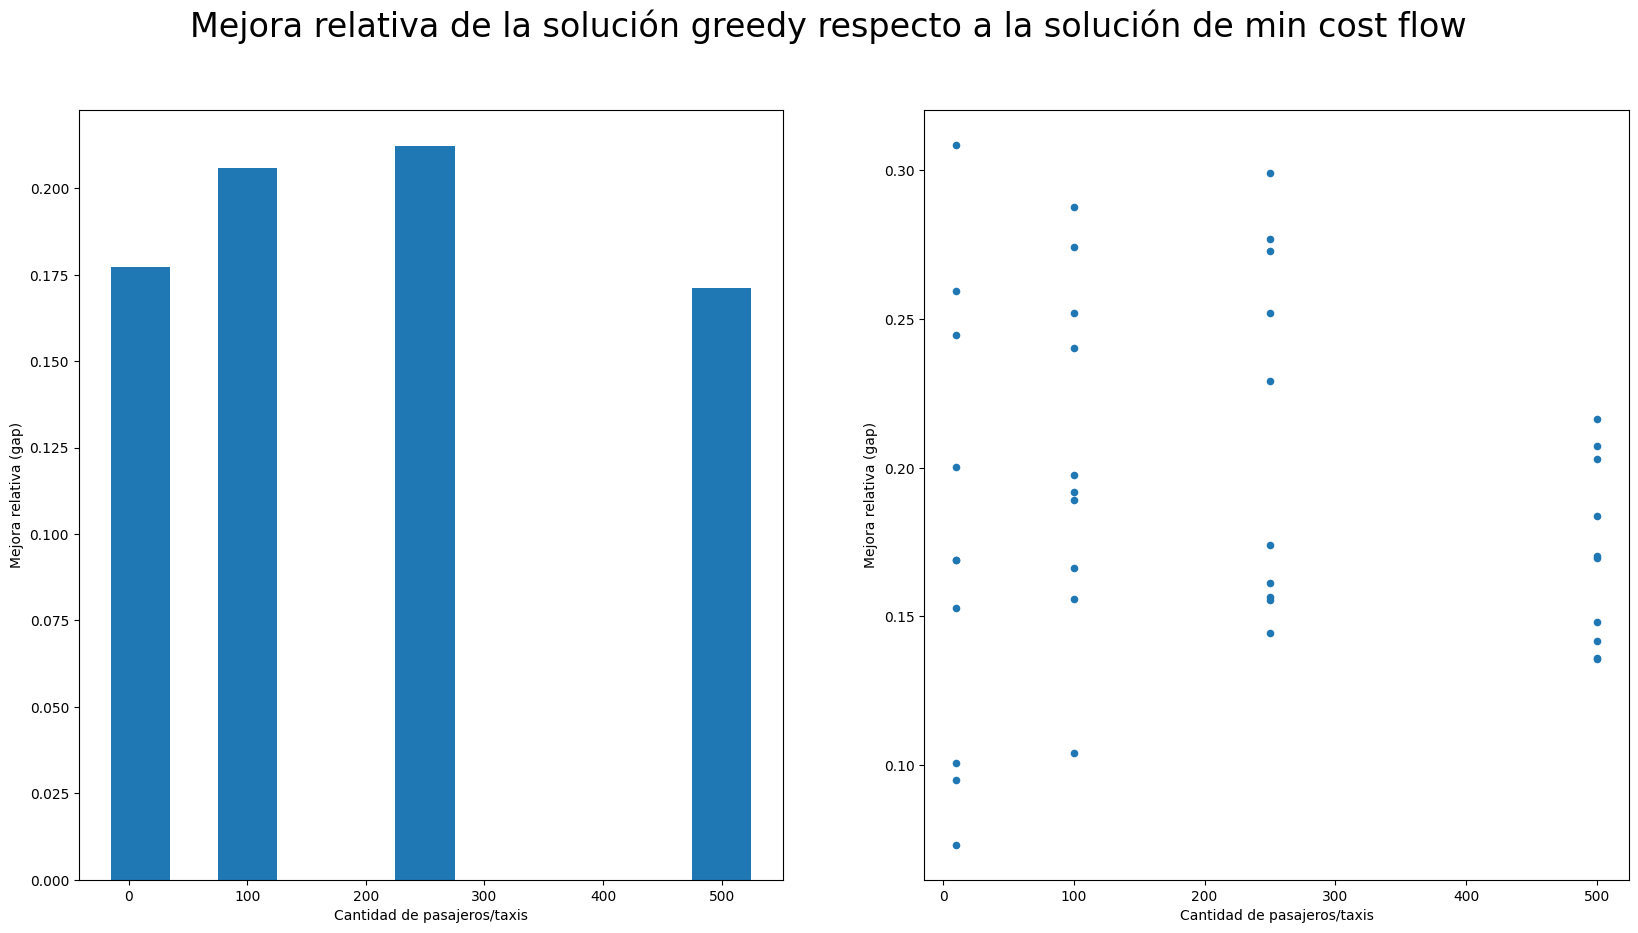

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].bar(ns, avg_gaps, width=50)
axs[0].set_xlabel("Cantidad de pasajeros/taxis")
axs[0].set_ylabel("Mejora relativa (gap)")
# axs[0].set_title("Mejora relativa de la solución greedy respecto a la solución de min cost flow")

_ = solutions.plot.scatter(x="n", y="gap", 
    # title="Mejora relativa de la solución greedy respecto a la solución de min cost flow",
    ax=axs[1]
)

axs[1].set_xlabel("Cantidad de pasajeros/taxis")
axs[1].set_ylabel("Mejora relativa (gap)")

fig.suptitle("Mejora relativa de la solución greedy respecto a la solución de min cost flow", fontsize=24)

plt.savefig("../output/figures/greedy_vs_batching_scatter_and_bar.png")

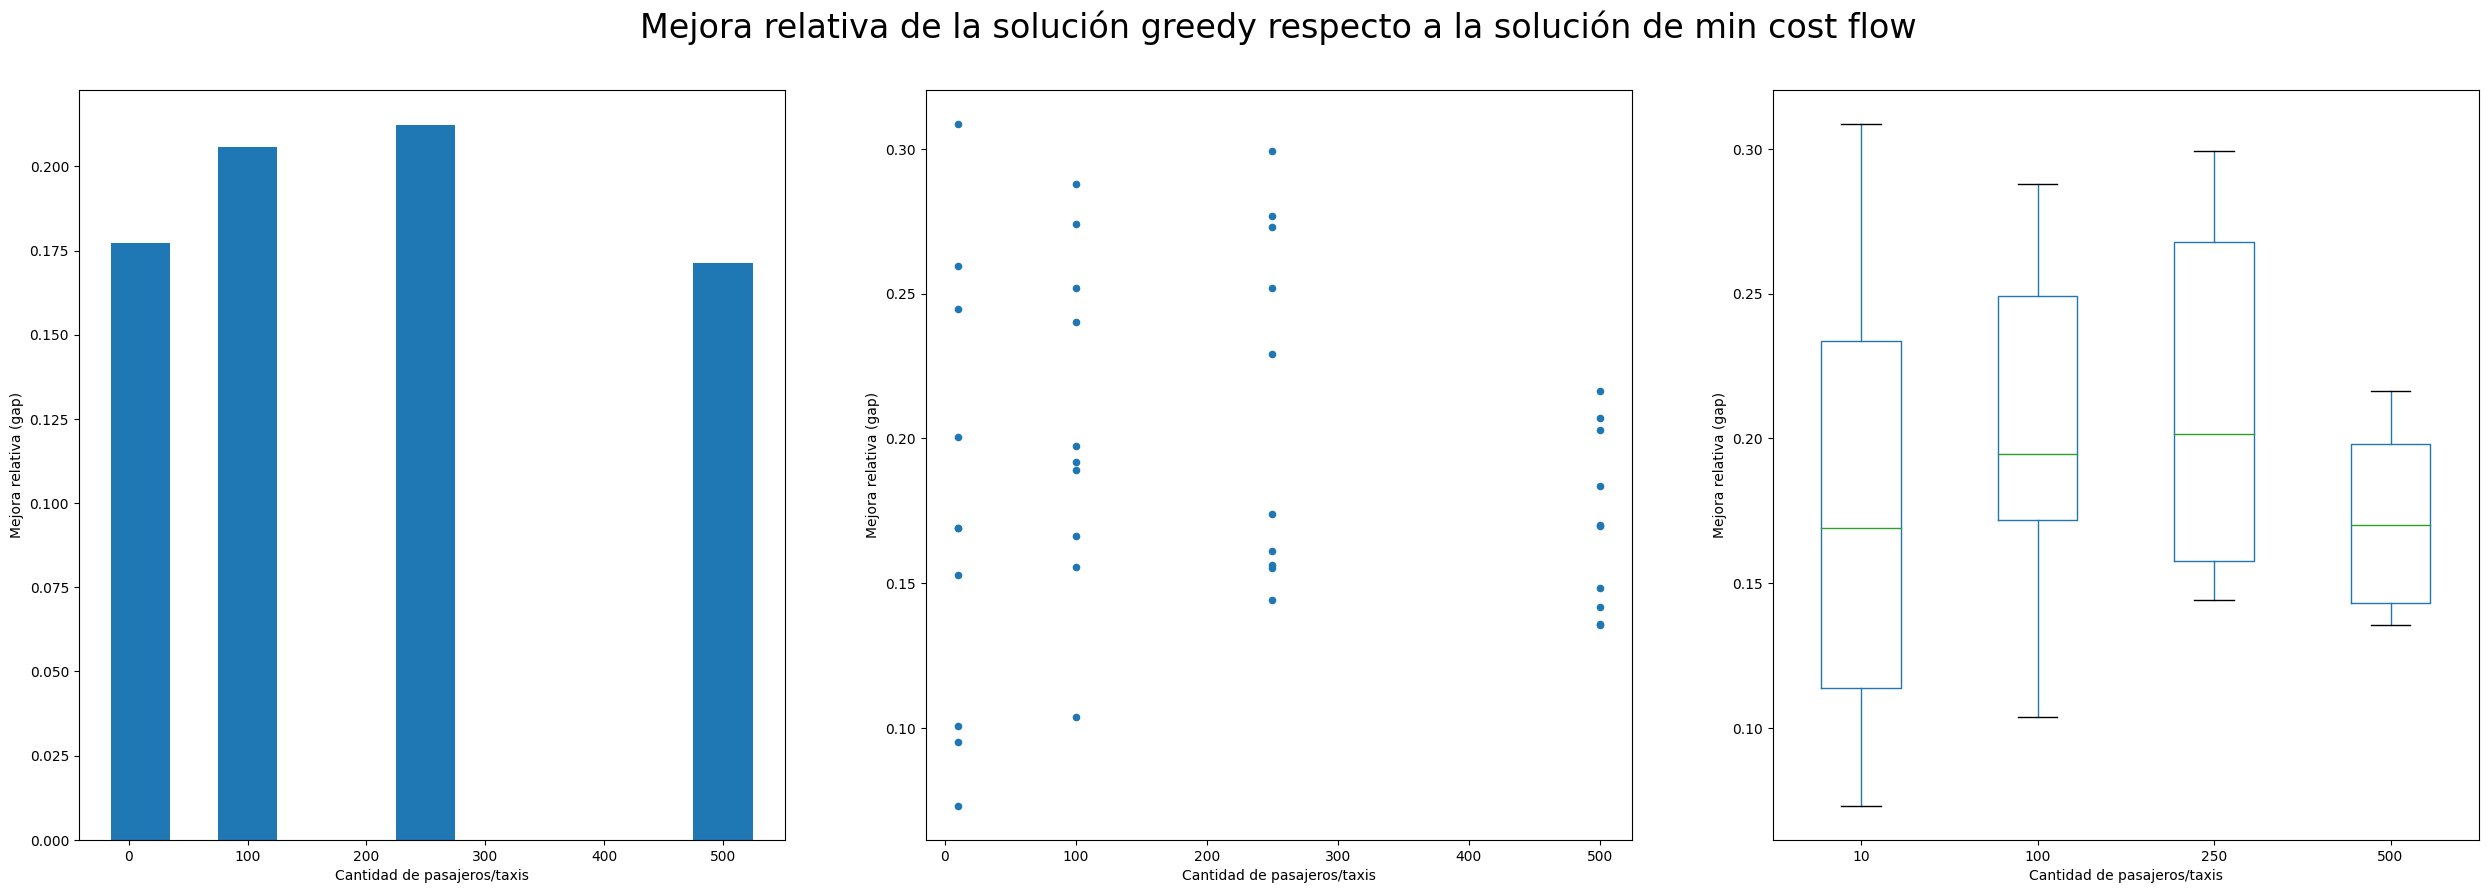

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

axs[0].bar(ns, avg_gaps, width=50)
axs[0].set_xlabel("Cantidad de pasajeros/taxis")
axs[0].set_ylabel("Mejora relativa (gap)")
# axs[0].set_title("Mejora relativa de la solución greedy respecto a la solución de min cost flow")

_ = solutions.plot.scatter(x="n", y="gap", 
    ax=axs[1]
)
axs[1].set_xlabel("Cantidad de pasajeros/taxis")
axs[1].set_ylabel("Mejora relativa (gap)")

solutions.boxplot(column="gap", by="n", ax=axs[2],
    grid=False
)

#ax.set_title("Mejora relativa de la solución greedy respecto a la solución de min cost flow")
axs[2].set_title("")
axs[2].set_xlabel("Cantidad de pasajeros/taxis")
axs[2].set_ylabel("Mejora relativa (gap)")

fig.suptitle("Mejora relativa de la solución greedy respecto a la solución de min cost flow", fontsize=24)

plt.savefig("../output/figures/greedy_vs_batching_scatter_bar_box.png")

## Idea: Generar instancias de prueba aleatorias

Generar 10 instancias de prueba para cada n con n entre [0, 500].

Una instancia de prueba es un csv de la forma:

* En la primera línea, el número de taxis/pasajeros $n$.
* Entre la fila 2 y $n+1$, las coordenadas de los taxis.
* Entre la fila $n+2$ y $2n+1$, las coordenadas de los pasajeros, la distancia de su viaje, el costo del viaje.
* Entre la fila $2n+2$ y $3n+1$, la matriz de distancias entre taxis y pasajeros.

Generar una instancia de prueba es generar un csv de la forma anterior.

Ejemplo para $n=10$:

In [ ]:
n = 10

# taxis
taxis : List[Tuple[int]]= [(random() * 100, random() * 100) for _ in range(n)]

# pasajeros
pasajeros : List[Tuple[int]] = [(random() * 100, random() * 100, random() * 100, random() * 100) for _ in range(n)]

# matriz de distancias
# Formula para calcular la distancia entre dos puntos (x1, y1) y (x2, y2):
# sqrt((x1 - x2)^2 + (y1 - y2)^2)

distancias : List[List[float]] = []

for i in range(n):
    distancias.append([])
    for j in range(n):
        distancias[i].append(((taxis[i][0] - pasajeros[j][0]) ** 2 + (taxis[i][1] - pasajeros[j][1]) ** 2) ** 0.5)

# Guardar en ../input/fake_instances/small_test.csv

with open('../input/fake_instances/small_test_5000.csv', 'w') as f:
    f.write(str(n) + '\n')
    for i in range(n):
        f.write(str(taxis[i][0]) + ',' + str(taxis[i][1]) + '\n')
    for i in range(n):
        f.write(str(pasajeros[i][0]) + ',' + str(pasajeros[i][1]) + ',' + str(pasajeros[i][2]) + ',' + str(pasajeros[i][3]) + '\n')
    for i in range(n):
        for j in range(n):
            f.write(str(distancias[i][j]) + ',')
        f.write('\n')


In [ ]:
def generate_instance(n: int):
    # taxis
    taxis : List[Tuple[int]]= [(random() * 100, random() * 100) for _ in range(n)]

    # pasajeros
    pasajeros : List[Tuple[int]] = [(random() * 100, random() * 100, random() * 100, random() * 100) for _ in range(n)]

    # matriz de distancias
    # Formula para calcular la distancia entre dos puntos (x1, y1) y (x2, y2):
    # sqrt((x1 - x2)^2 + (y1 - y2)^2)

    distancias : List[List[float]] = []

    for i in range(n):
        distancias.append([])
        for j in range(n):
            distancias[i].append(((taxis[i][0] - pasajeros[j][0]) ** 2 + (taxis[i][1] - pasajeros[j][1]) ** 2) ** 0.5)
    
    return taxis, pasajeros, distancias

def write_csv(n, taxis, pasajeros, distancias,  k=None):

    with open('../input/fake_instances/batched/' + str(n) + '/xxl_fake_' + str(k) + '.csv', 'w') as f:
        f.write(str(n) + '\n')
        for i in range(n):
            f.write(str(taxis[i][0]) + ',' + str(taxis[i][1]) + '\n')
        for i in range(n):
            f.write(str(pasajeros[i][0]) + ',' + str(pasajeros[i][1]) + ',' + str(pasajeros[i][2]) + ',' + str(pasajeros[i][3]) + '\n')
        for i in range(n):
            for j in range(n):
                f.write(str(distancias[i][j]) + ',')
            f.write('\n')

In [ ]:
# Generar 10 instancias de prueba para cada n en [2, 500]
for n in tqdm(range(2, 501)):
    for i in range(1):
        taxis, pasajeros, distancias = generate_instance(n)
        write_csv(n, taxis, pasajeros, distancias)

In [ ]:
!mkdir ../input/fake_instances

In [ ]:
!rm -rf ../input/fake_instances && mkdir ../input/fake_instances

In [ ]:
from multiprocess import Pool
import os

In [ ]:
# Paralelizar el código anterior

with Pool(10) as p:
    instances = p.map(generate_instance, range(2, 501))
    for j in range(10):
        for n, (taxis, pasajeros, distancias) in enumerate(tqdm(instances)):
            write_csv(n, taxis, pasajeros, distancias, j)


## Experimentación sobre instancias de prueba

In [16]:
ad_hoc_solutions = pd.read_csv("../output/fake/results.csv")
ad_hoc_solutions.head()

filename    n  greedy_cost  min_cost_flow_cost  \
0  input/fake_instances/fake_403_6.csv  403      2587.86            1922.110   
1   input/fake_instances/fake_78_1.csv   78      1265.03             943.192   
2  input/fake_instances/fake_446_6.csv  446      3304.80            2196.170   
3  input/fake_instances/fake_460_5.csv  460      3487.10            2259.200   
4  input/fake_instances/fake_398_9.csv  398      3613.14            2578.070   

   greedy_time  min_cost_flow_time  priority_cost  priority_time  
0     0.658875            41.68110       2054.340       50.36580  
1     0.038583             1.29067        994.488        1.44458  
2     0.780417            52.30880       2390.200       45.54520  
3     0.784416            48.57390       2518.440       51.50390  
4     0.667834            41.68870       2828.010       38.68040

In [17]:
ad_hoc_solutions = ad_hoc_solutions[ad_hoc_solutions["n"] > 2]

In [18]:
#solutions["gap"] = (solutions["greedy_cost"] - solutions["min_cost_flow_cost"]) / solutions["min_cost_flow_cost"]
ad_hoc_solutions["gap"] = (ad_hoc_solutions["greedy_cost"] - ad_hoc_solutions["min_cost_flow_cost"]) / ad_hoc_solutions["min_cost_flow_cost"]
ad_hoc_solutions.head()


filename    n  greedy_cost  min_cost_flow_cost  \
0  input/fake_instances/fake_403_6.csv  403      2587.86            1922.110   
1   input/fake_instances/fake_78_1.csv   78      1265.03             943.192   
2  input/fake_instances/fake_446_6.csv  446      3304.80            2196.170   
3  input/fake_instances/fake_460_5.csv  460      3487.10            2259.200   
4  input/fake_instances/fake_398_9.csv  398      3613.14            2578.070   

   greedy_time  min_cost_flow_time  priority_cost  priority_time       gap  
0     0.658875            41.68110       2054.340       50.36580  0.346364  
1     0.038583             1.29067        994.488        1.44458  0.341222  
2     0.780417            52.30880       2390.200       45.54520  0.504802  
3     0.784416            48.57390       2518.440       51.50390  0.543511  
4     0.667834            41.68870       2828.010       38.68040  0.401490

In [19]:
ad_hoc_solutions["gap"].describe()

count    4960.000000
mean        0.417210
std         0.097456
min         0.058418
25%         0.366200
50%         0.427162
75%         0.483098
max         0.772146
Name: gap, dtype: float64

In [20]:
ad_hoc_solutions.groupby("n")["gap"].describe()
#print(ad_hoc_solutions.groupby("n")["gap"].describe().to_markdown())

count      mean           std       min       25%       50%       75%  \
n                                                                            
3     10.0  0.335435  0.000000e+00  0.335435  0.335435  0.335435  0.335435   
4     10.0  0.772146  0.000000e+00  0.772146  0.772146  0.772146  0.772146   
5     10.0  0.088242  0.000000e+00  0.088242  0.088242  0.088242  0.088242   
6     10.0  0.157427  2.925695e-17  0.157427  0.157427  0.157427  0.157427   
7     10.0  0.202027  2.925695e-17  0.202027  0.202027  0.202027  0.202027   
..     ...       ...           ...       ...       ...       ...       ...   
494   10.0  0.433143  5.851389e-17  0.433143  0.433143  0.433143  0.433143   
495   10.0  0.578101  0.000000e+00  0.578101  0.578101  0.578101  0.578101   
496   10.0  0.464340  0.000000e+00  0.464340  0.464340  0.464340  0.464340   
497   10.0  0.538973  0.000000e+00  0.538973  0.538973  0.538973  0.538973   
498   10.0  0.476677  0.000000e+00  0.476677  0.476677  0.476677  0.476677   

          max  
n              
3    0.335435  
4    0.772146  
5    0.088242  
6    0.157427  
7    0.202027  
..        ...  
494  0.433143  
495  0.578101  
496  0.464340  
497  0.538973  
498  0.476677  

[496 rows x 8 columns]

In [21]:
# ad_hoc_solutions.groupby("n")["gap"].describe()
# Get values every 50

mean_res = ad_hoc_solutions[(ad_hoc_solutions["n"] % 50 == 0) | (ad_hoc_solutions["n"] == 498) | (ad_hoc_solutions["n"] == 3)].groupby("n")["gap"].describe()
mean_res.drop(columns=["count", "min", "max", "25%", "50%", "75%", "std"])
#print(mean_res.drop(columns=["count", "min", "max", "25%", "50%", "75%", "std"]).to_markdown())

mean
n            
3    0.335435
50   0.470381
100  0.262508
150  0.380710
200  0.488713
250  0.477224
300  0.469546
350  0.500416
400  0.399574
450  0.449788
498  0.476677

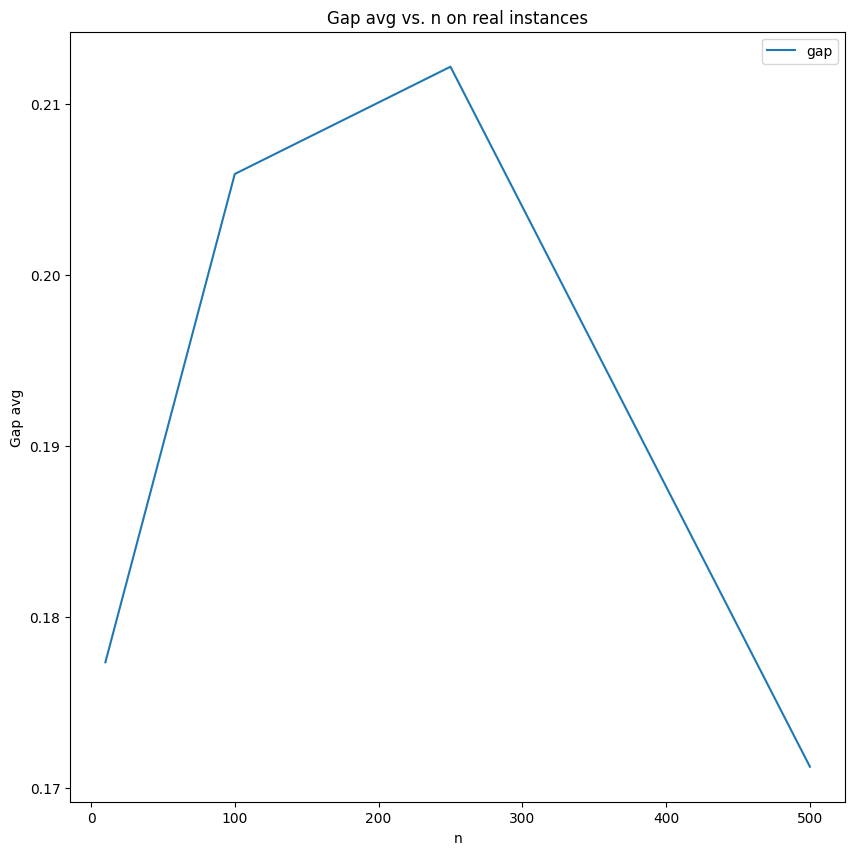

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
solutions.groupby("n")[["gap"]].mean().plot(ax=ax)

ax.set_title("Gap avg vs. n on real instances")

ax.set_xlabel("n")
ax.set_ylabel("Gap avg")

plt.savefig("../output/figures/gap_avg_vs_n_real.png")

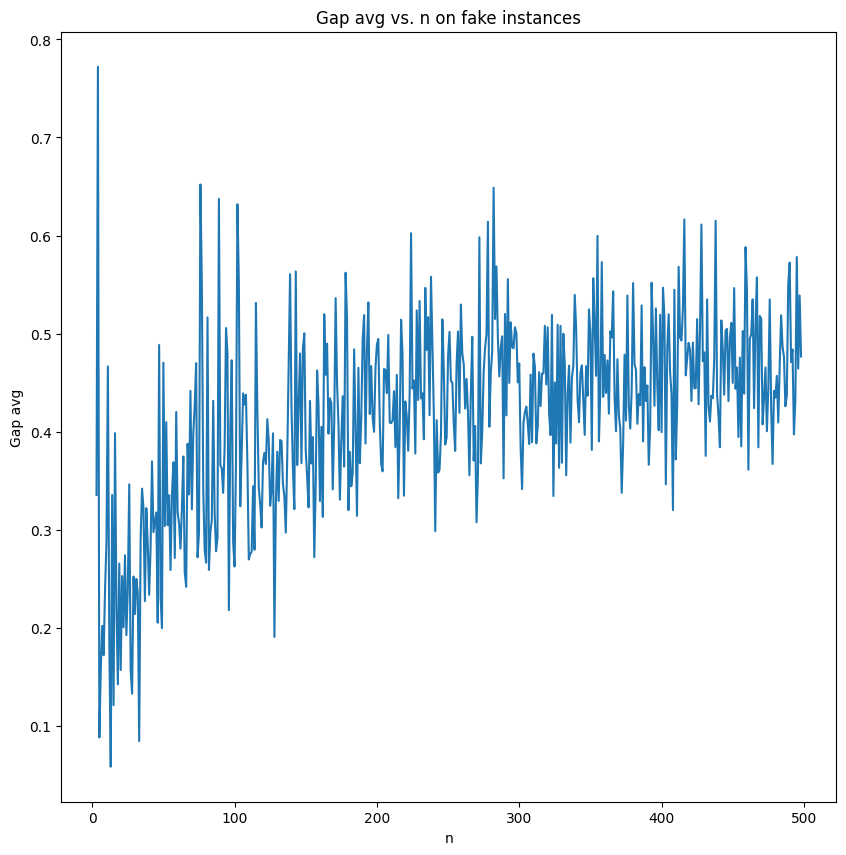

In [25]:
# Plot gap avg vs. n
fig, ax = plt.subplots(figsize=(10, 10))

ad_hoc_solutions.groupby("n")["gap"].mean().plot(ax=ax)

ax.set_title("Gap avg vs. n on fake instances")
ax.set_xlabel("n")
ax.set_ylabel("Gap avg")

plt.savefig("../output/figures/gap_avg_vs_n_fake.png")

/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


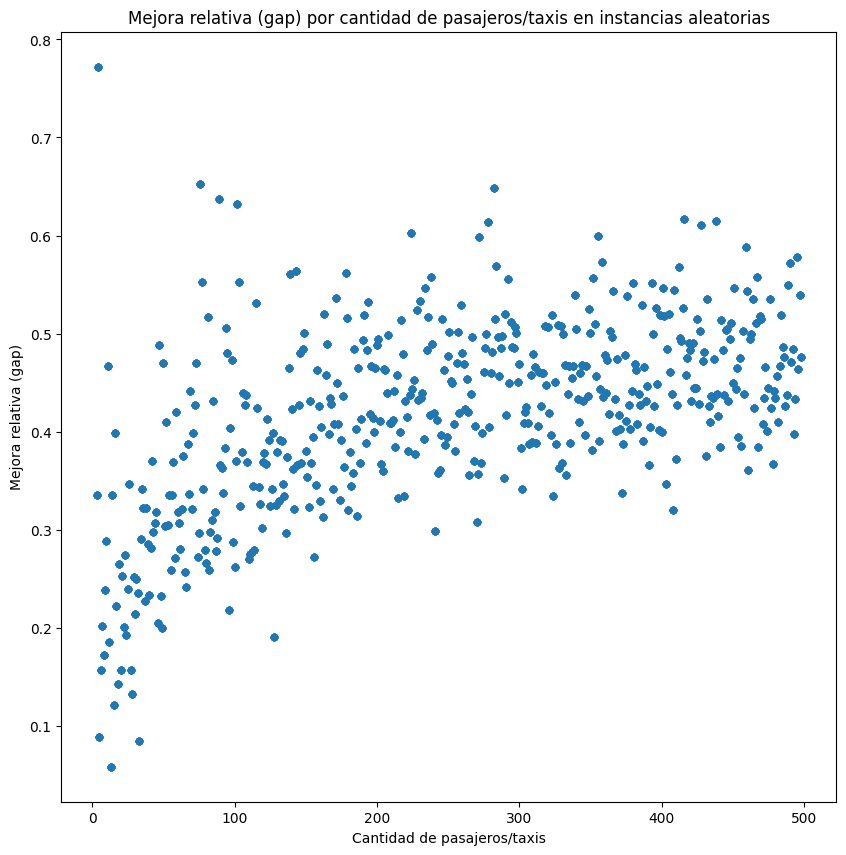

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))


ad_hoc_solutions.plot.scatter(
    x="n", y="gap", 
    title="Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias",
    ax=ax
)



ax.set_xlabel("Cantidad de pasajeros/taxis")
ax.set_ylabel("Mejora relativa (gap)")

plt.savefig("../output/figures/gap_vs_n_fake_scatter.png")

<Axes: title={'center': 'gap'}, xlabel='n'>

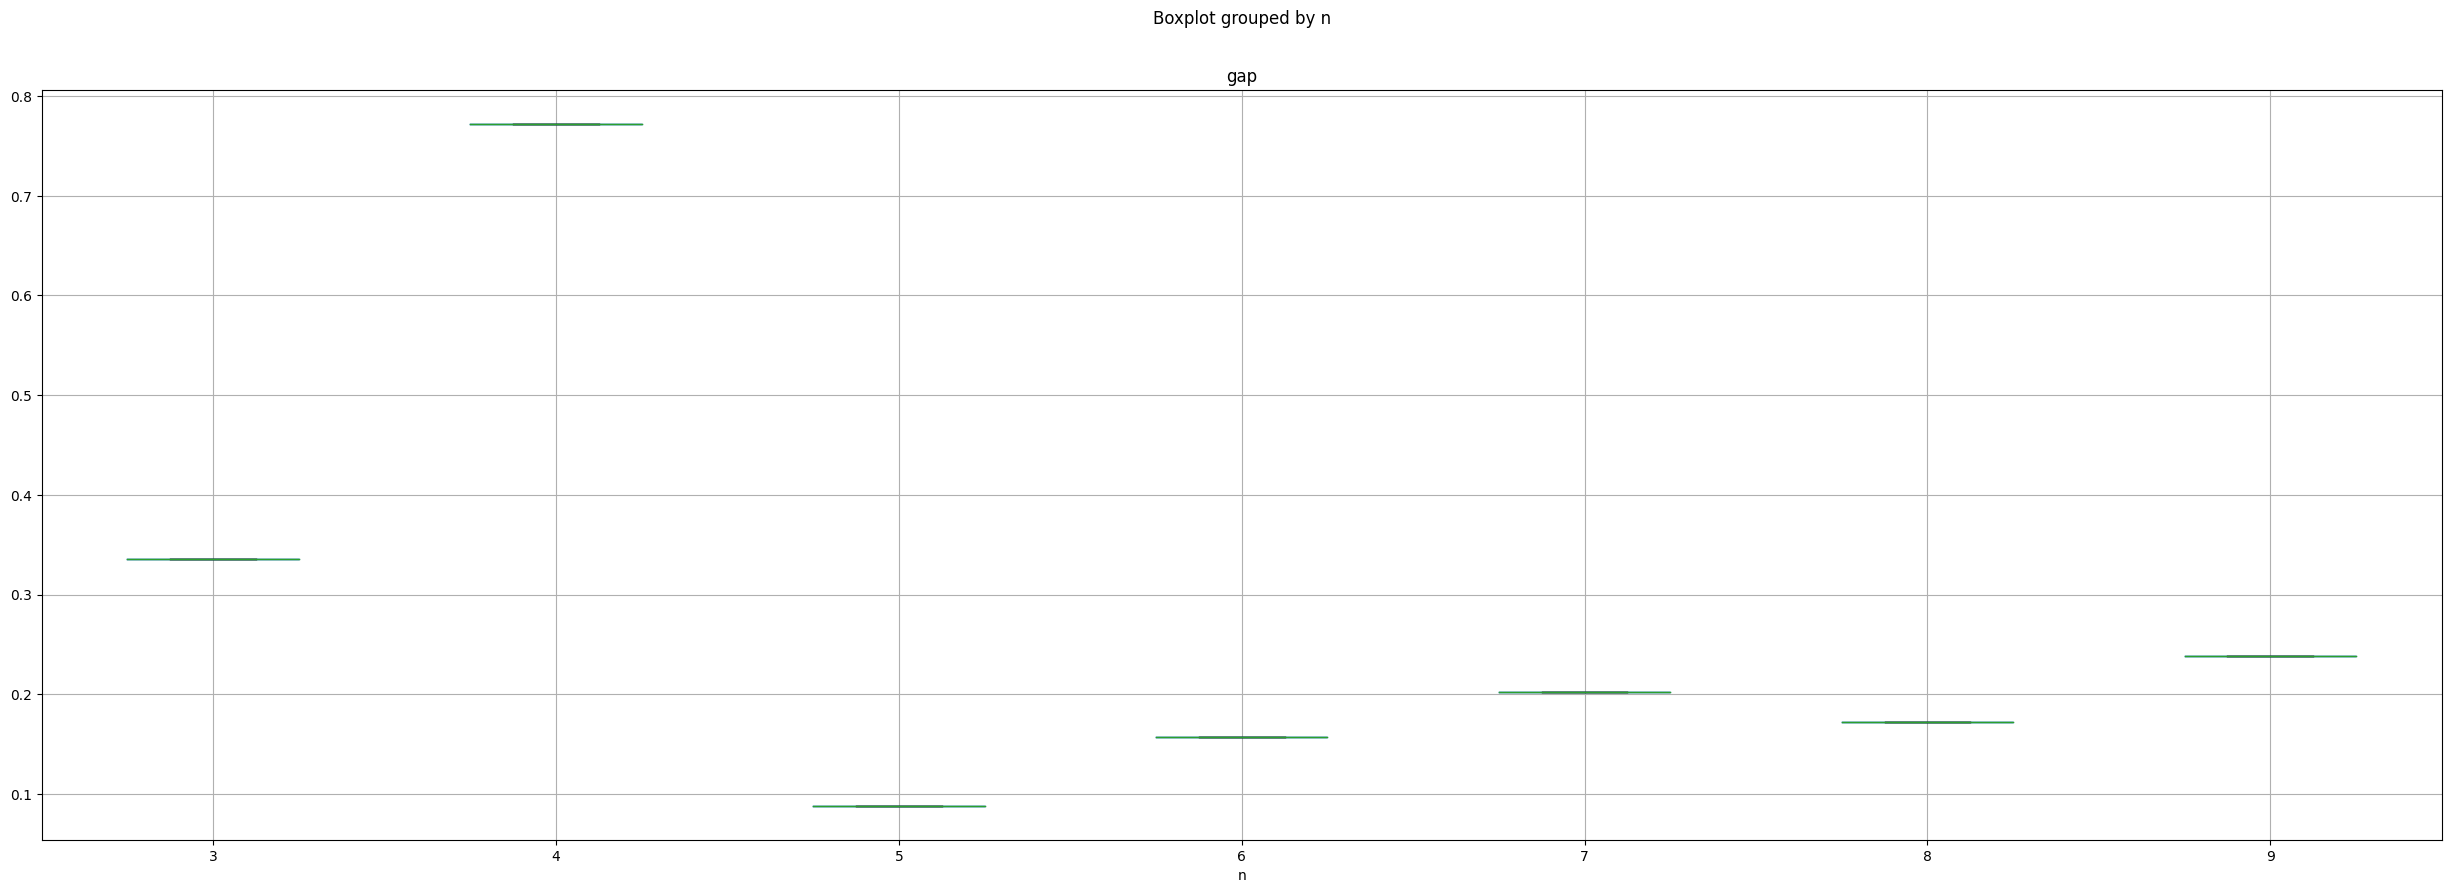

In [27]:
ad_hoc_solutions[ad_hoc_solutions["n"] < 10].boxplot(column="gap", by="n", figsize=(30, 10))

Text(0.5, 0.98, 'Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias')

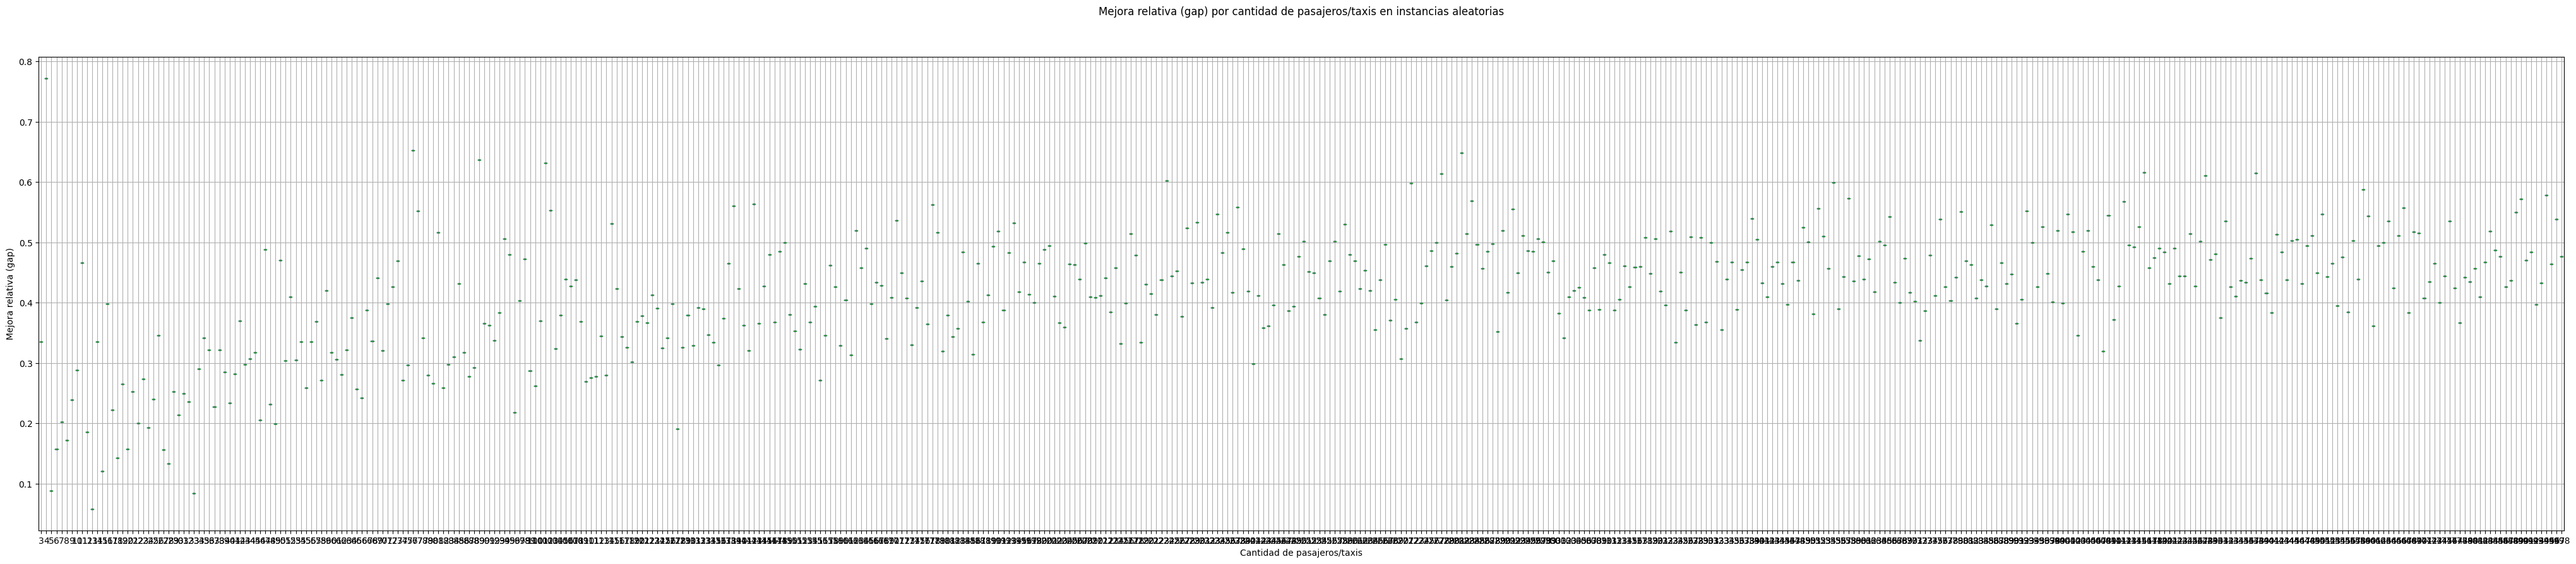

In [28]:
fig, ax = plt.subplots(figsize=(50, 10))

#boxplot

ad_hoc_solutions.boxplot(column="gap", by="n", ax=ax)

ax.set_title("")
ax.set_xlabel("Cantidad de pasajeros/taxis")
ax.set_ylabel("Mejora relativa (gap)")

fig.suptitle("Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias")

#plt.savefig("../output/figures/gap_vs_n_fake_scatter.png")

In [29]:
[str(i * 50) for i in range(1, 10)]

['50', '100', '150', '200', '250', '300', '350', '400', '450']

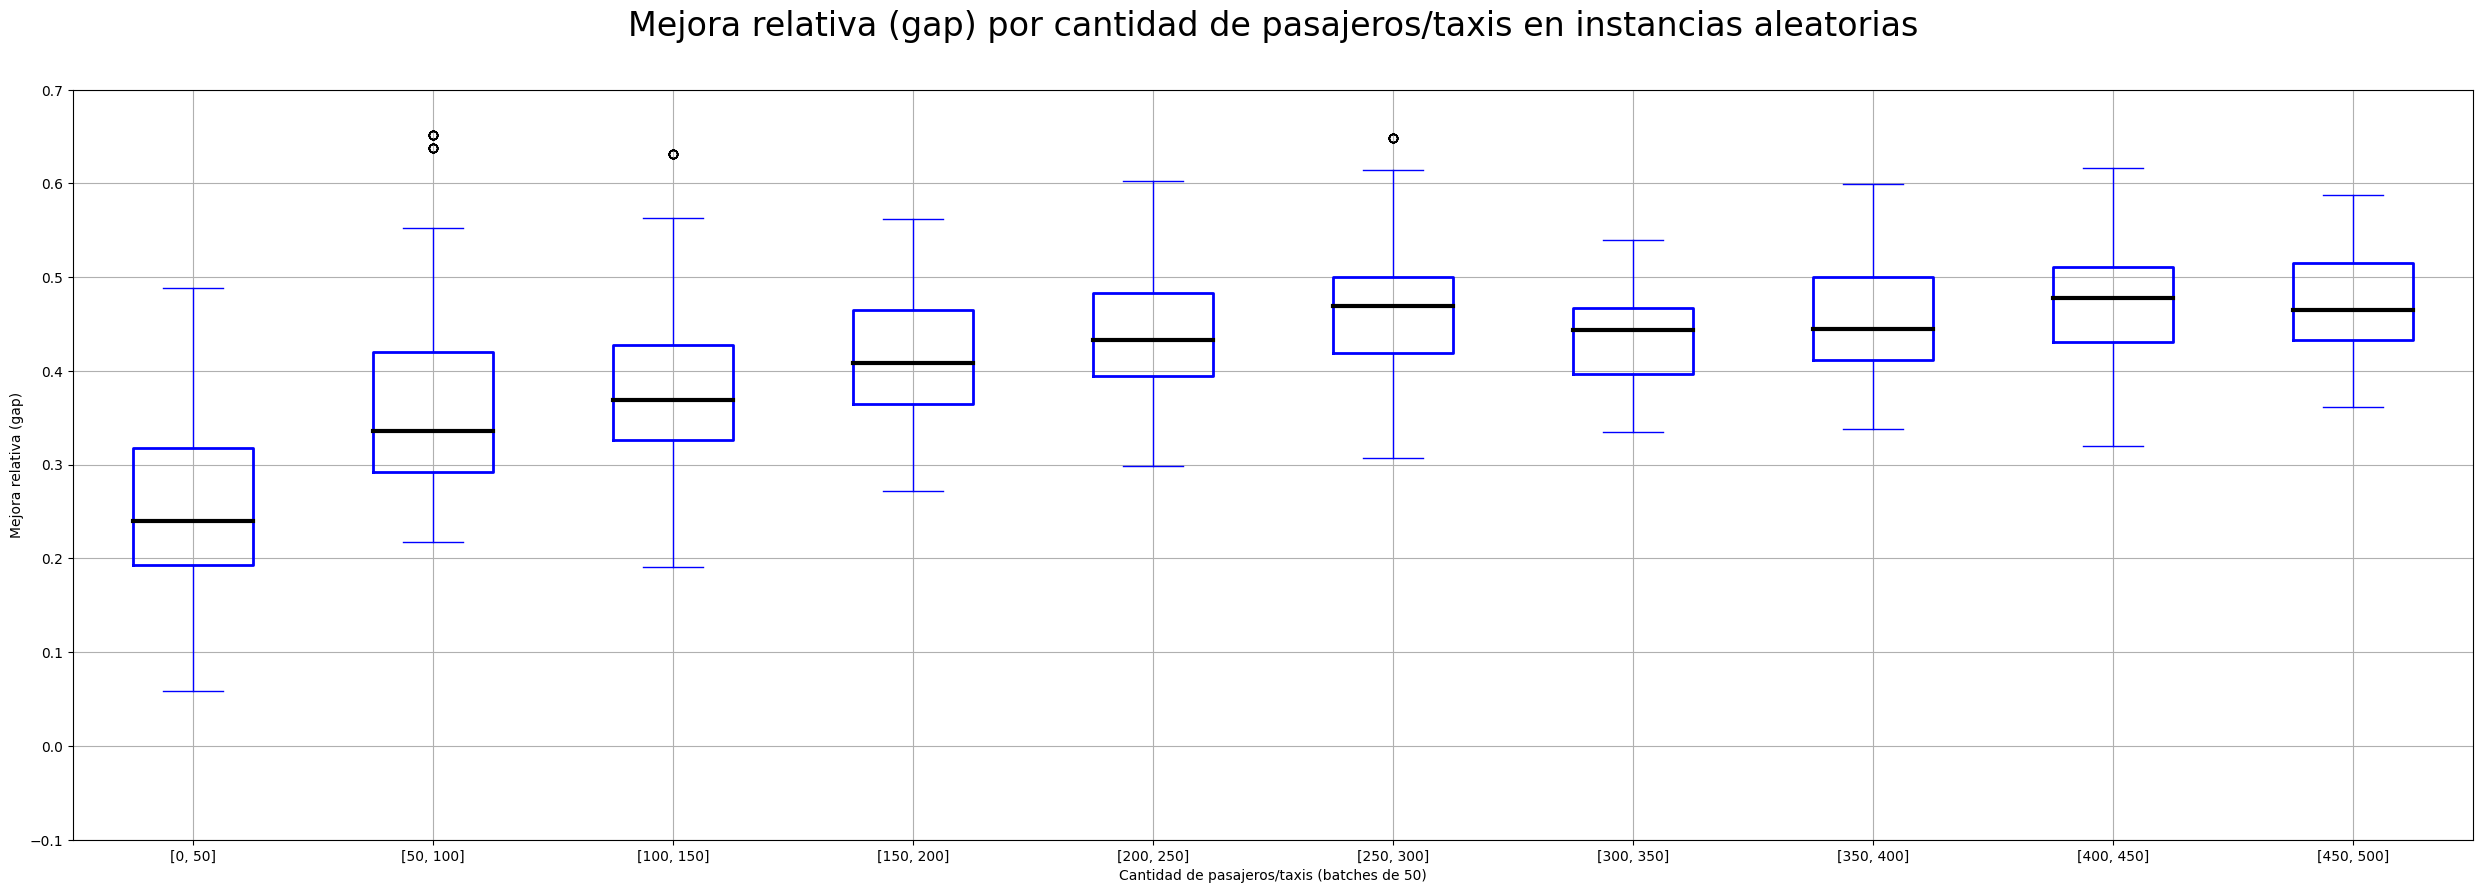

In [30]:
fig, ax = plt.subplots(figsize=(30, 10))

#boxplot

#ad_hoc_solutions.boxplot(column="gap", by="n", ax=ax)

# Batch ad_hoc_solutions n in batches of 50

ad_hoc_solutions["n_batch"] = ad_hoc_solutions["n"] // 50

ad_hoc_solutions.boxplot(
    column="gap", 
    by="n_batch", 
    ax=ax,
    color="blue",
    boxprops=dict(linestyle='-', linewidth=2, color="blue"),
    medianprops=dict(linestyle='-', linewidth=3, color="black"),
)

#ax.set_title("Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias")
ax.set_title("")
ax.set_xlabel("Cantidad de pasajeros/taxis (batches de 50)")
ax.set_ylabel("Mejora relativa (gap)")

# Replace xticks to be the batch number intervals of 50 (0, 50, 100, 150, ...)
# Without affecting the scale of the plot

ax.set_xticklabels([f"[{i*50}, {(i+1)*50}]"  for i in range(0, 10)])

ax.set_ylim(-0.1, 0.7)

fig.suptitle("Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias", fontsize=24)

plt.savefig("../output/figures/gap_vs_n_fake_box.png")

<Axes: xlabel='n_batch'>

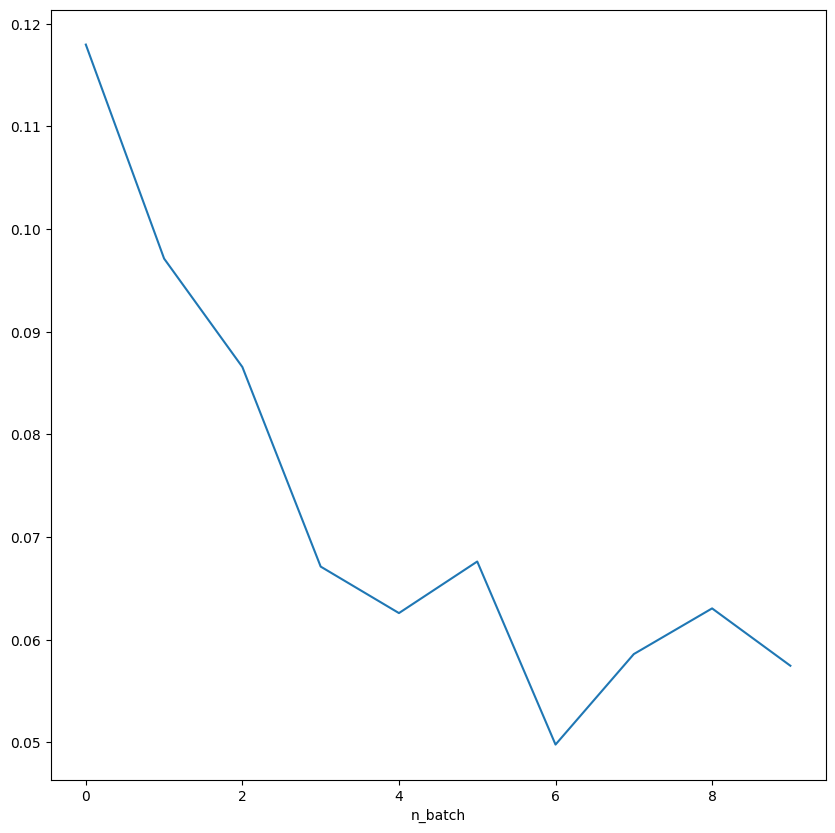

In [31]:
# Plot std vs. n

fig, ax = plt.subplots(figsize=(10, 10))

ad_hoc_solutions.groupby("n_batch")["gap"].std().plot(ax=ax)

In [32]:
ad_hoc_solutions.groupby("n_batch")["gap"].std()

n_batch
0    0.117963
1    0.097114
2    0.086551
3    0.067112
4    0.062583
5    0.067606
6    0.049773
7    0.058589
8    0.063040
9    0.057453
Name: gap, dtype: float64

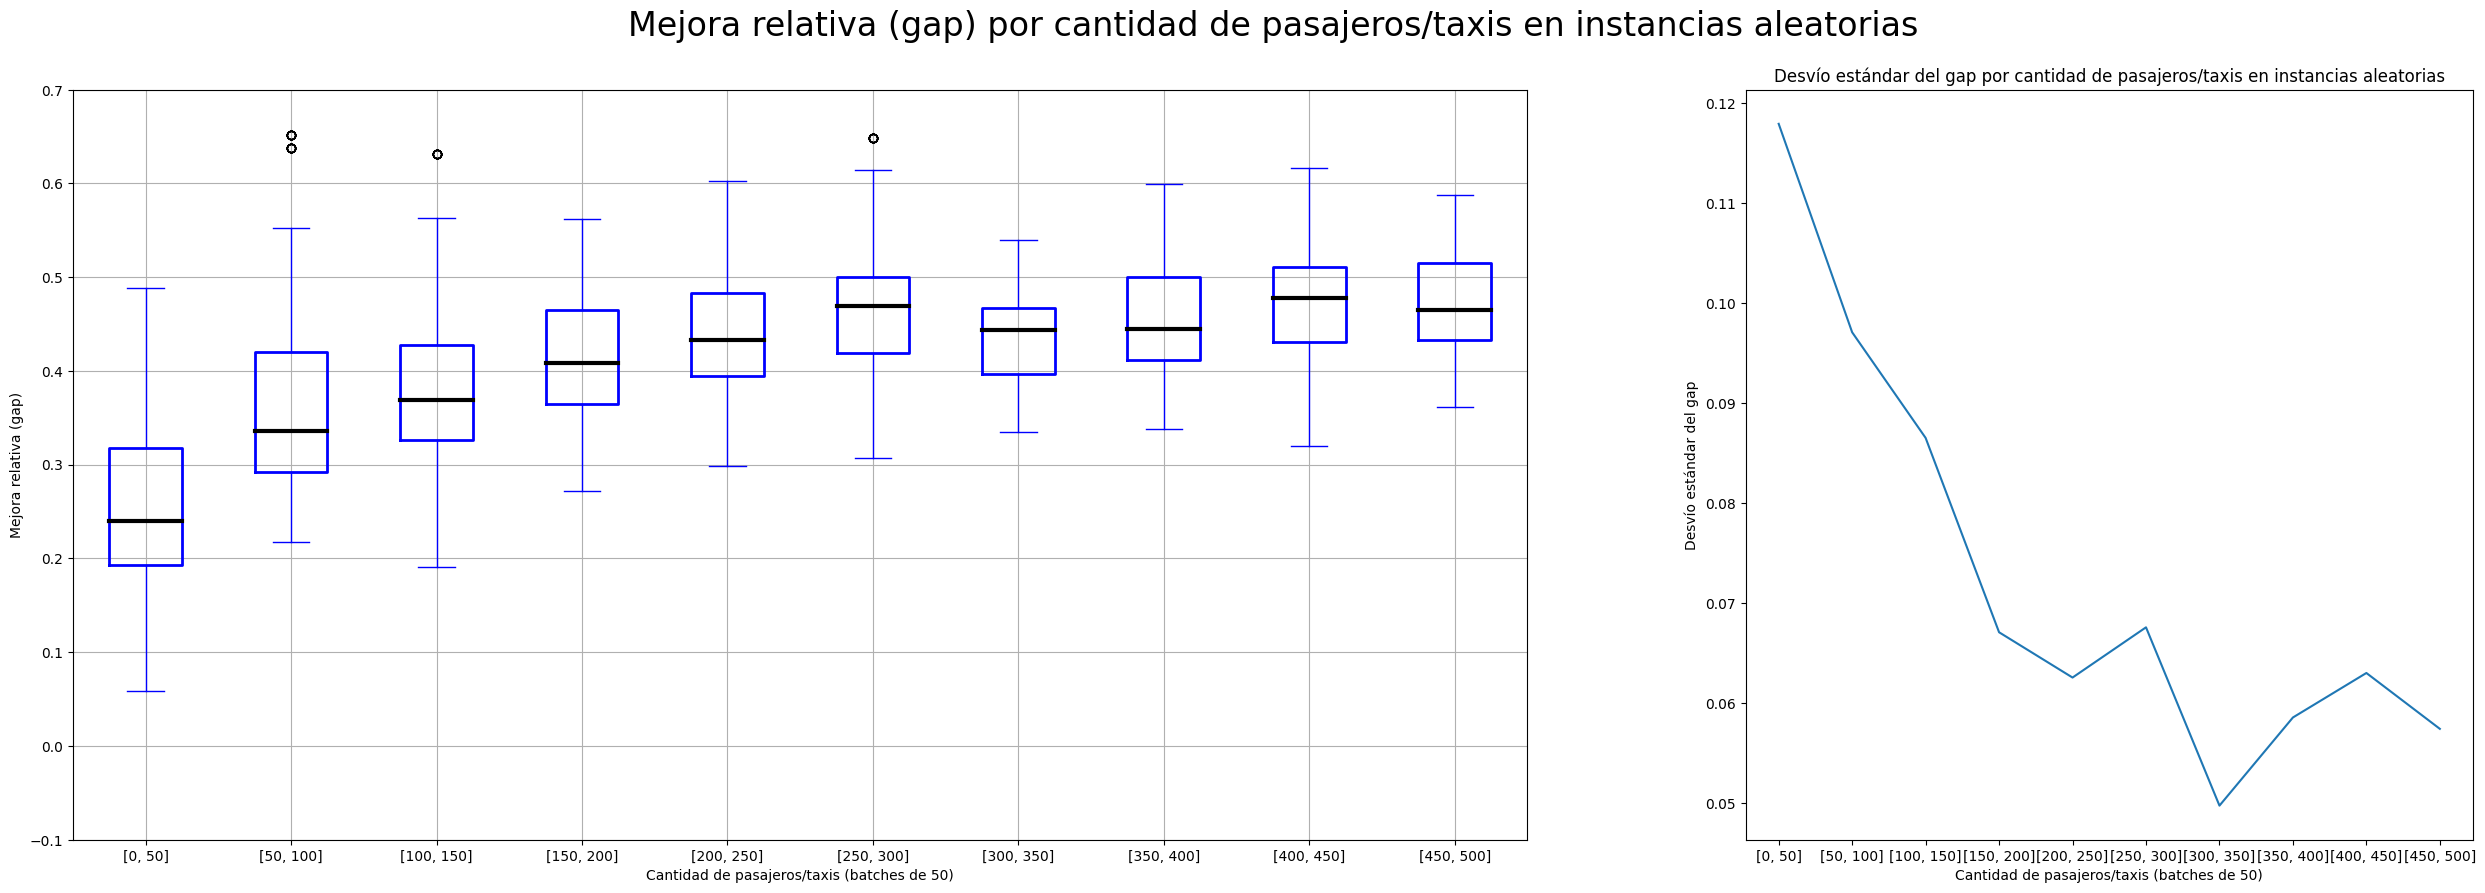

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10), width_ratios=[2, 1])

#boxplot

#ad_hoc_solutions.boxplot(column="gap", by="n", ax=ax)

# Batch ad_hoc_solutions n in batches of 50

ad_hoc_solutions["n_batch"] = ad_hoc_solutions["n"] // 50

ad_hoc_solutions.boxplot(
    column="gap", 
    by="n_batch", 
    ax=axs[0],
    color="blue",
    boxprops=dict(linestyle='-', linewidth=2, color="blue"),
    medianprops=dict(linestyle='-', linewidth=3, color="black"),
)

#axs[0].set_title("Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias")
axs[0].set_title("")
axs[0].set_xlabel("Cantidad de pasajeros/taxis (batches de 50)")
axs[0].set_ylabel("Mejora relativa (gap)")

# Replace xticks to be the batch number intervals of 50 (0, 50, 100, 150, ...)
# Without affecting the scale of the plot

axs[0].set_xticklabels([f"[{i*50}, {(i+1)*50}]"  for i in range(0, 10)])

axs[0].set_ylim(-0.1, 0.7)

ad_hoc_solutions.groupby("n_batch")["gap"].std().plot(ax=axs[1])

axs[1].set_title("Desvío estándar del gap por cantidad de pasajeros/taxis en instancias aleatorias")

axs[1].set_xlabel("Cantidad de pasajeros/taxis (batches de 50)")
axs[1].set_ylabel("Desvío estándar del gap")

axs[1].set_xticks(range(0, 10))

axs[1].set_xticklabels([f"[{i*50}, {(i+1)*50}]" for i in range(0, 10)])

fig.suptitle("Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias", fontsize=24)

plt.savefig("../output/figures/gap_vs_n_fake_box_std.png")

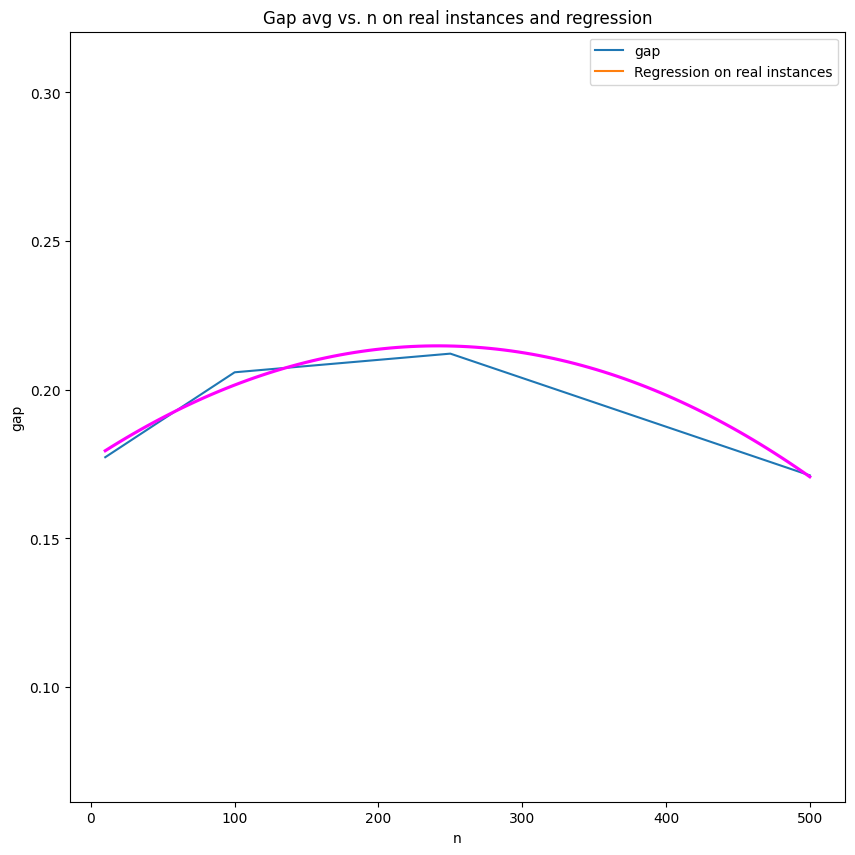

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))

solutions.groupby("n")[["gap"]].mean().plot(ax=ax, label="Mean gap")
reg_line = sns.regplot(
                x="n",
                y="gap",
                data=solutions,
                order=2,
                ci=None,
                color="fuchsia",
                marker="",
                ax=ax,
                #label="Regression on real instances",
            )

ax.plot(
    [], [],
    label="Regression on real instances"
)

_ = ax.legend()

ax.set_title("Gap avg vs. n on real instances and regression")

plt.savefig("../output/figures/gap_avg_vs_n_real_reg.png")

[]

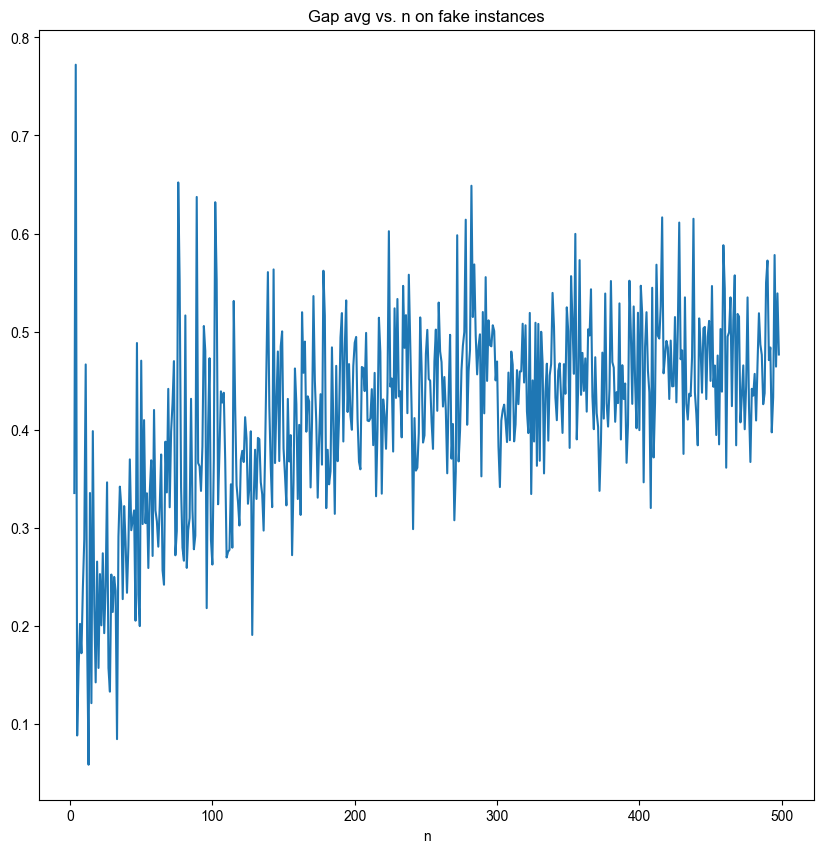

In [35]:
# Add a regression line

fig, ax = plt.subplots(figsize=(10, 10))

#reset axes
ax = ad_hoc_solutions.groupby("n")["gap"].mean().plot()
_ = sns.set_theme(style="whitegrid")

ax.set_title("Gap avg vs. n on fake instances")
ax.set_xlabel("n")

ax.plot()


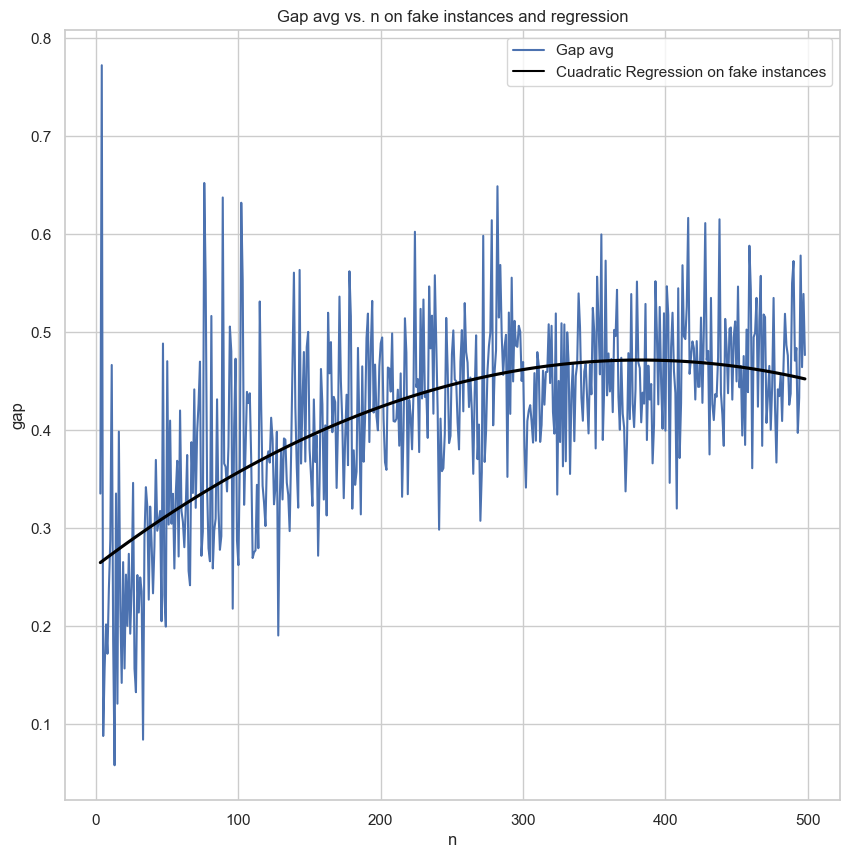

In [36]:
# add ns and avg_gaps to the plot
fig, ax = plt.subplots(figsize=(10, 10))

ad_hoc_solutions.groupby("n")["gap"].mean().plot(
    label= "Gap avg",
)

sns.set_theme(style="whitegrid")

ax = sns.regplot(
                x="n",
                y="gap",
                data=ad_hoc_solutions,
                order=2,
                ci=None,
                color="black",
                marker="",
            )

ax.plot(
    [], [],
    color="black",
    marker="",
    label="Cuadratic Regression on fake instances",
)

ax.set_title("Gap avg vs. n on fake instances and regression")
ax.set_xlabel("n")

#ax.legend(["Gap avg", "Cuadratic Regression"])
_ = ax.legend()

ax.plot()

plt.savefig("../output/figures/gap_avg_vs_n_fake_reg.png")
        

/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


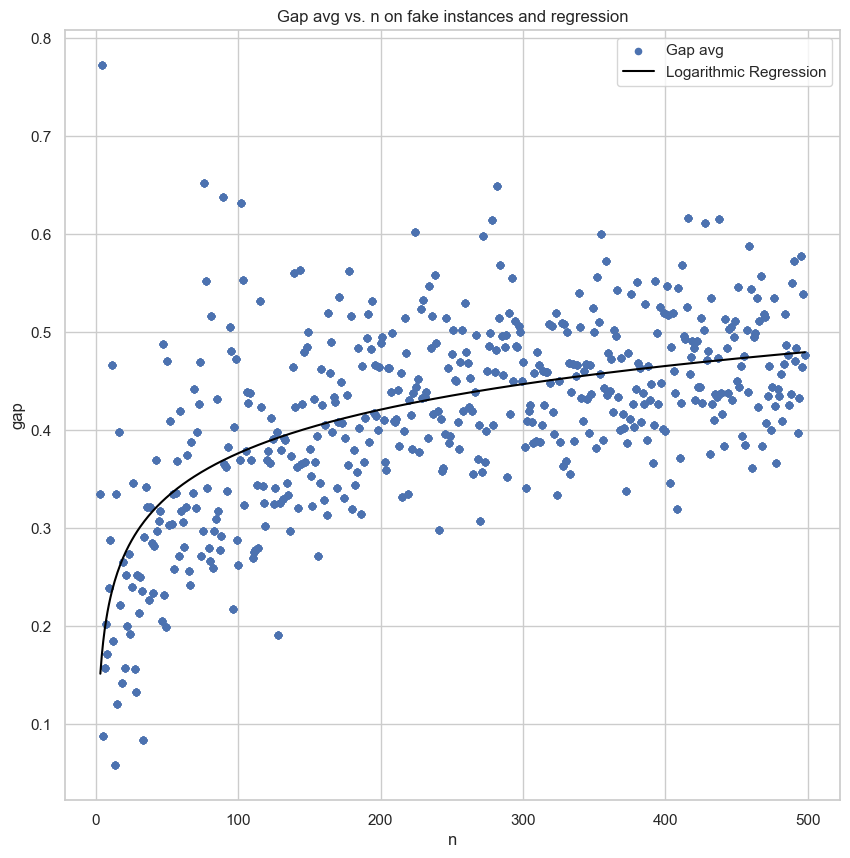

In [37]:
# add ns and avg_gaps to the plot
fig, ax = plt.subplots(figsize=(10, 10))

ad_hoc_solutions.plot.scatter(x="n", y="gap", title="gap vs. n", ax=ax)

sns.set_theme(style="whitegrid")

# Logarithmic regression

log_reg = np.polyfit(
                np.log(ad_hoc_solutions["n"]), 
                ad_hoc_solutions["gap"],
                1
        )
ad_hoc_solutions["reg_log"] = log_reg[0] * np.log(ad_hoc_solutions["n"]) + log_reg[1]

fake_reg_vals = ad_hoc_solutions.groupby("n")["reg_log"].mean()

ax.plot(fake_reg_vals, color="black", label="Logarithmic regression")

# plot the logarithmic regression line with seaborn

ax.set_title("Gap avg vs. n on fake instances and regression")
ax.set_xlabel("n")

ax.legend(["Gap avg", "Logarithmic Regression"])

ax.plot()

plt.savefig("../output/figures/gap_avg_vs_n_fake_scatter_log_reg.png")
        

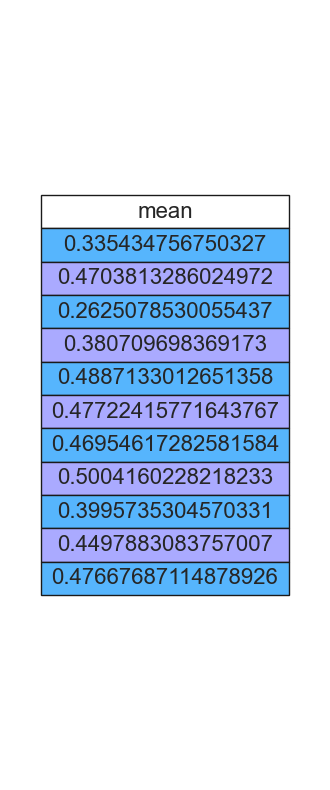

In [38]:
fig, ax = plt.subplots(figsize=(4, 10))

ax.axis("off")

mean_res_ = mean_res.drop(columns=["count", "min", "max", "25%", "50%", "75%", "std"])

t = ax.table(
    cellText=mean_res_.values,
    colLabels=mean_res_.columns,
    loc="center",
    colWidths=[0.8] * len(mean_res_.columns),
    cellLoc="center",
    rowLoc="center",
    cellColours= [["#56b5fd" if i % 2 == 0 else "#AAAAFF"] for i in range(len(mean_res_))],
)

t.auto_set_font_size(False)
t.set_fontsize(16)

# Set the height of each row to 5 units
t.scale(1, 2)


/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


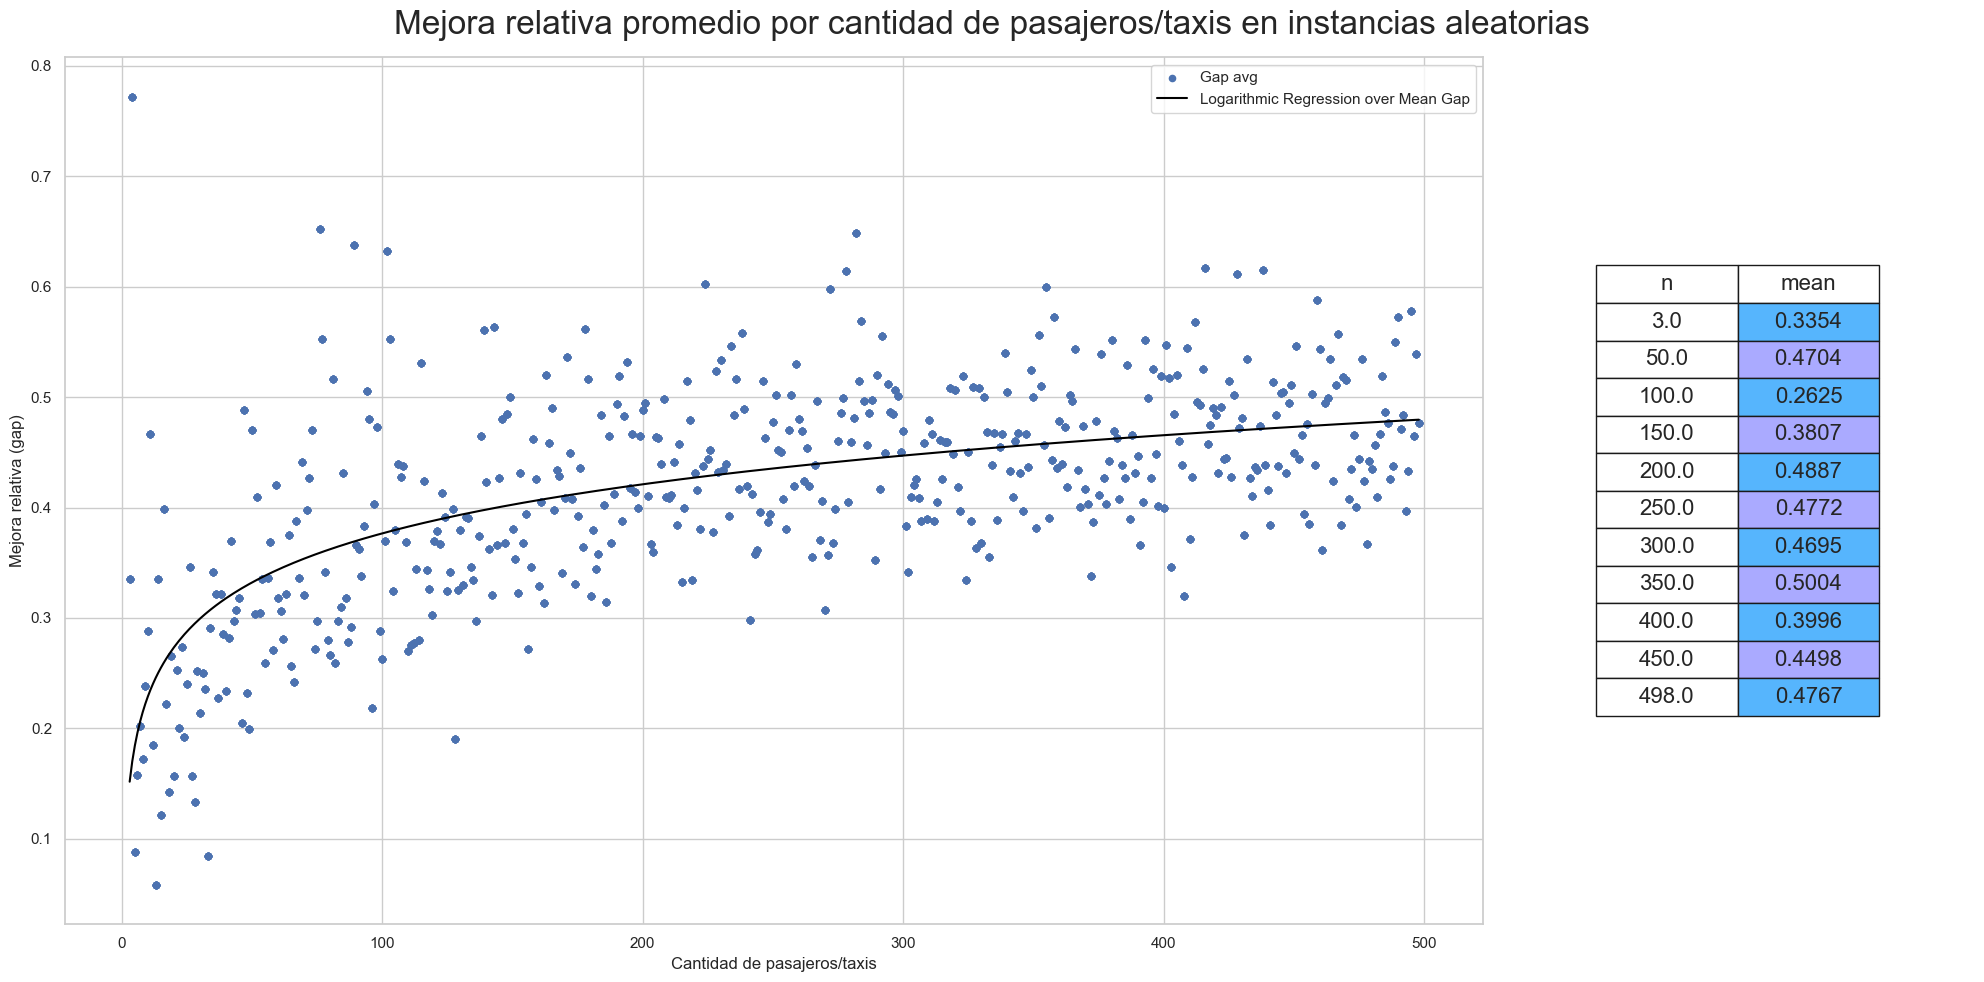

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), width_ratios=[3, 1])

ad_hoc_solutions.plot.scatter(x="n", y="gap", ax=axs[0])
#print(mean_res.drop(columns=["count", "min", "max", "25%", "50%", "75%", "std"]).to_markdown())

s = axs[0].plot(fake_reg_vals, color="black", label="Logarithmic regression")

# plot the logarithmic regression line with seaborn

#axs[0].set_title("Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias")
#axs[0].set_xlabel("n")

axs[0].legend(["Gap avg", "Logarithmic Regression over Mean Gap"])

axs[1].axis("off")

mean_res_ = mean_res.drop(columns=["count", "min", "max", "25%", "50%", "75%", "std"])

mean_res_["mean"] = mean_res_["mean"].apply(lambda x: round(x, 4))
mean_res_["n"] = mean_res_.index
# round n to int
mean_res_["n"] = mean_res_["n"].apply(lambda x: "{:.0f}".format(x))
mean_res_["n"] = mean_res_["n"].astype(int)

mean_res_ = mean_res_.reset_index(drop=True)

t = axs[1].table(
    cellText=mean_res_[["n", "mean"]].values,
    colLabels=mean_res_[["n", "mean"]].columns,
    loc="center",
    colWidths=[0.3] * len(mean_res_.columns),
    cellLoc="center",
    rowLoc="center",
    cellColours= [["#ffffff", "#56b5fd" if i % 2 == 0 else "#AAAAFF"] for i in range(len(mean_res_))],
)

t.auto_set_font_size(False)
t.set_fontsize(16)

# Set the height of each row to 5 units
t.scale(1, 2)

# axs[0].title.set_text("Mejora relativa promedio por cantidad de pasajeros/taxis en instancias aleatorias")
axs[0].set_xlabel("Cantidad de pasajeros/taxis")
axs[0].set_ylabel("Mejora relativa (gap)")

fig.suptitle("Mejora relativa promedio por cantidad de pasajeros/taxis en instancias aleatorias", fontsize=24)
fig.tight_layout()

plt.savefig("../output/figures/gap_avg_vs_n_fake_scatter_log_reg_table.png")


/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


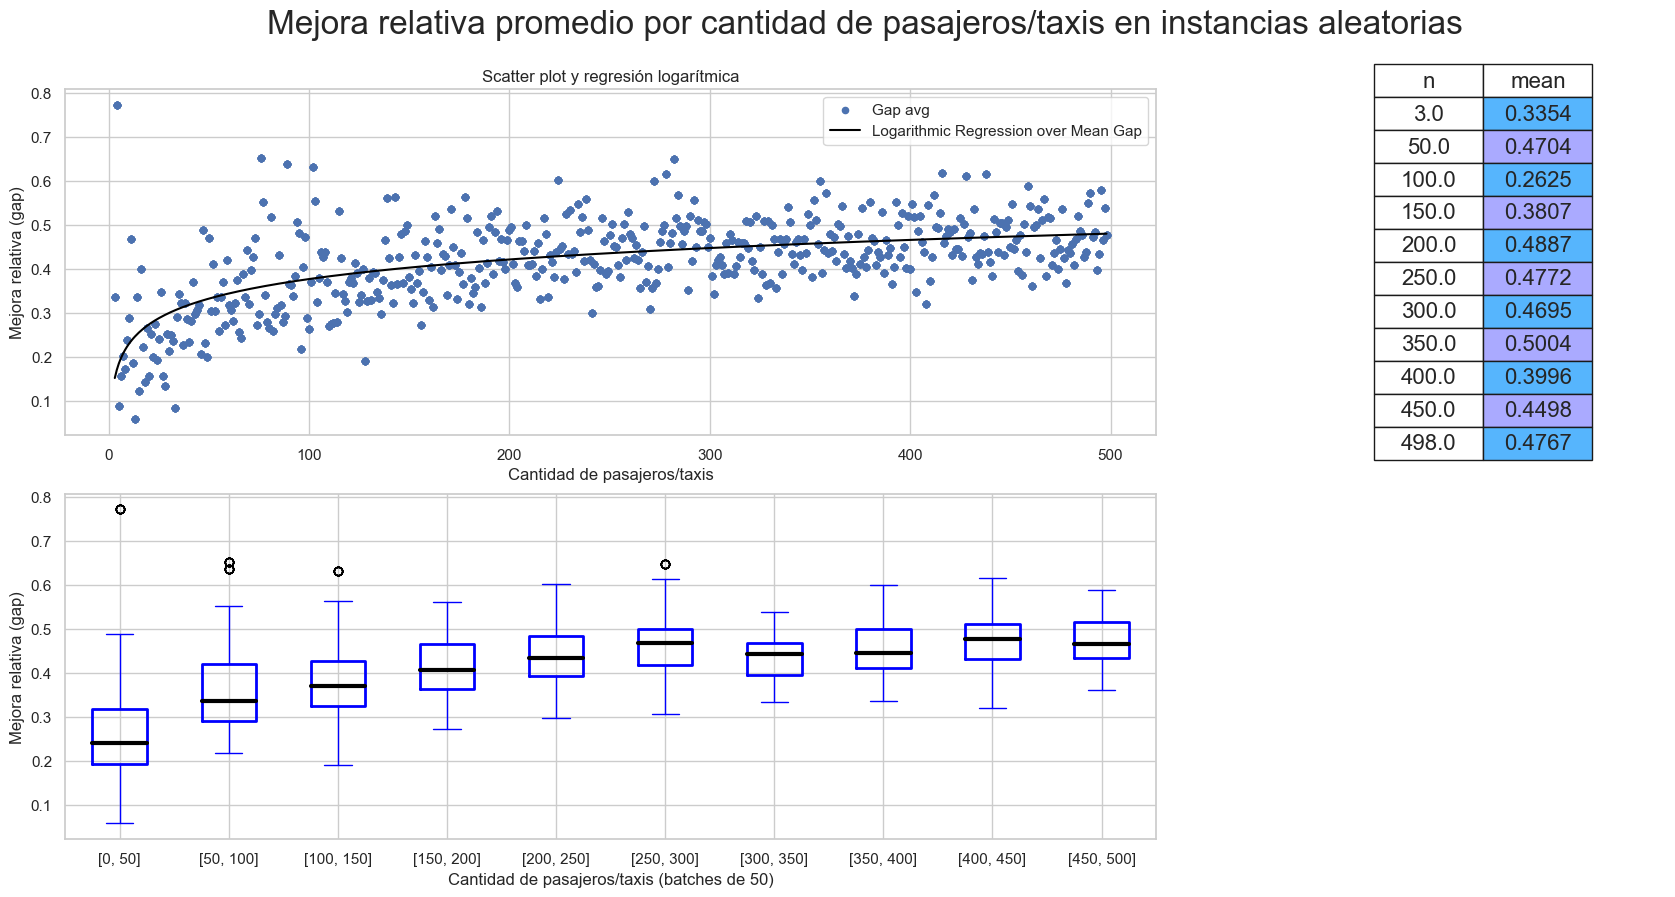

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10), width_ratios=[3, 1], height_ratios=[1, 1])

ad_hoc_solutions.plot.scatter(x="n", y="gap", ax=axs[0, 0])
#print(mean_res.drop(columns=["count", "min", "max", "25%", "50%", "75%", "std"]).to_markdown())

s = axs[0, 0].plot(fake_reg_vals, color="black", label="Logarithmic regression")

# plot the logarithmic regression line with seaborn

#axs[0, 0].set_title("Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias")
#axs[0, 0].set_xlabel("n")

axs[0, 0].legend(["Gap avg", "Logarithmic Regression over Mean Gap"])

axs[0, 1].axis("off")

mean_res_ = mean_res.drop(columns=["count", "min", "max", "25%", "50%", "75%", "std"])

mean_res_["mean"] = mean_res_["mean"].apply(lambda x: round(x, 4))
mean_res_["n"] = mean_res_.index
# round n to int
mean_res_["n"] = mean_res_["n"].apply(lambda x: "{:.0f}".format(x))
mean_res_["n"] = mean_res_["n"].astype(int)

mean_res_ = mean_res_.reset_index(drop=True)

t = axs[0, 1].table(
    cellText=mean_res_[["n", "mean"]].values,
    colLabels=mean_res_[["n", "mean"]].columns,
    loc="center",
    colWidths=[0.3] * len(mean_res_.columns),
    cellLoc="center",
    rowLoc="center",
    cellColours= [["#ffffff", "#56b5fd" if i % 2 == 0 else "#AAAAFF"] for i in range(len(mean_res_))],
)

t.auto_set_font_size(False)
t.set_fontsize(16)

# Set the height of each row to 5 units
t.scale(1, 2)

axs[0, 0].title.set_text("Scatter plot y regresión logarítmica")
axs[0, 0].set_xlabel("Cantidad de pasajeros/taxis")
axs[0, 0].set_ylabel("Mejora relativa (gap)")

fig.tight_layout()

#boxplot

#ad_hoc_solutions.boxplot(column="gap", by="n", ax=ax)

# Batch ad_hoc_solutions n in batches of 50

ad_hoc_solutions["n_batch"] = ad_hoc_solutions["n"] // 50

ad_hoc_solutions.boxplot(
    column="gap", 
    by="n_batch", 
    ax=axs[1, 0],
    color="blue",
    boxprops=dict(linestyle='-', linewidth=2, color="blue"),
    medianprops=dict(linestyle='-', linewidth=3, color="black"),
)

axs[1, 1].axis("off")

#ax.set_title("Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias")
axs[1, 0].set_title("")
axs[1, 0].set_xlabel("Cantidad de pasajeros/taxis (batches de 50)")
axs[1, 0].set_ylabel("Mejora relativa (gap)")

# Replace xticks to be the batch number intervals of 50 (0, 50, 100, 150, ...)
# Without affecting the scale of the plot

axs[1, 0].set_xticklabels([f"[{i*50}, {(i+1)*50}]"  for i in range(0, 10)])

fig.suptitle("Mejora relativa promedio por cantidad de pasajeros/taxis en instancias aleatorias", fontsize=24)
#fig.suptitle("Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias")

plt.savefig("../output/figures/gap_vs_n_fake_box_scatter.png")

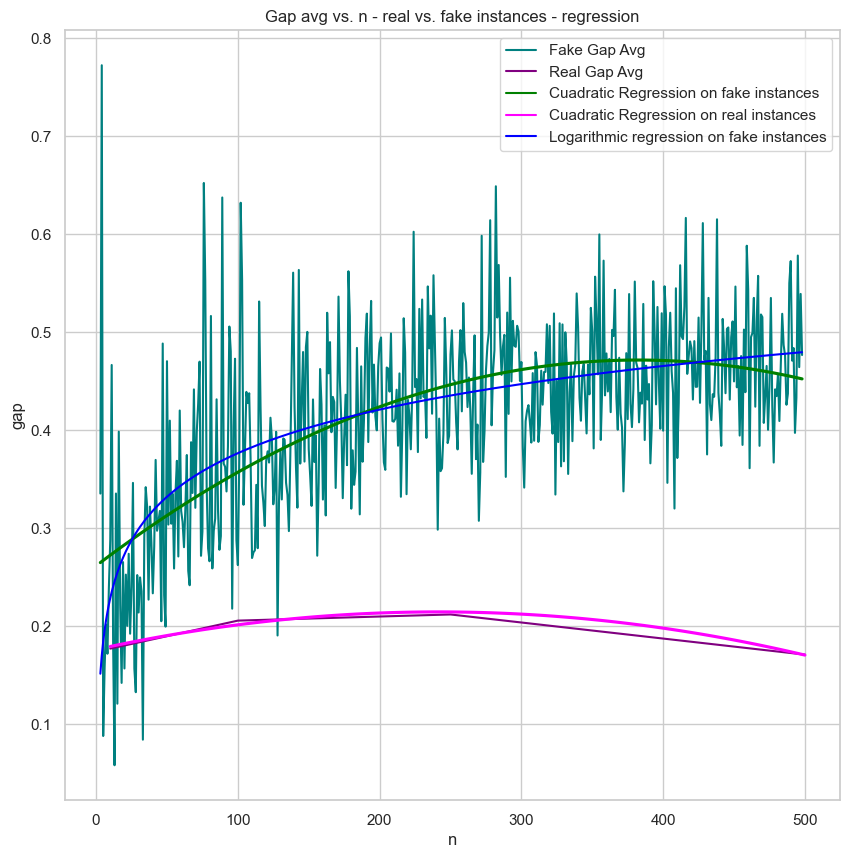

In [41]:
fig, ax = plt.subplots(figsize=(10, 10))

fake_vals = ad_hoc_solutions.groupby("n")[["gap"]].mean()
real_vals = solutions.groupby("n")[["gap"]].mean()

ax.plot(fake_vals.index, fake_vals["gap"], color="teal", label="Fake Gap Avg")
ax.plot(real_vals.index, real_vals["gap"], color="purple", label="Real Gap Avg")

# Get regression line for fake instances

reg_line = sns.regplot(
                x="n",
                y="gap",
                data=ad_hoc_solutions,
                order=2,
                ci=None,
                color="green",
                marker="",
                ax=ax,
                #label="Cuadratic Regression on fake instances",
            )

reg_line = sns.regplot(
                x="n",
                y="gap",
                data=solutions,
                order=2,
                ci=None,
                color="fuchsia",
                marker="",
                ax=ax,
                #label="Cuadratic Regression on real instances",
            )

ax.plot(
    [], [],
    color="green",
    label="Cuadratic Regression on fake instances"
)

ax.plot(
    [], [],
    color="fuchsia",
    label="Cuadratic Regression on real instances"
)

ax.plot(fake_reg_vals, color="blue", label="Logarithmic regression on fake instances")

ax.set_title("Gap avg vs. n - real vs. fake instances - regression")
ax.set_xlabel("n")

_ = ax.legend()

plt.savefig("../output/figures/gap_avg_vs_n_real_fake_reg.png")

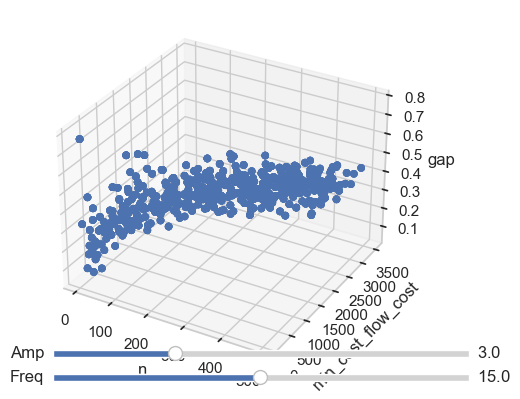

In [42]:
# 3d plot of gap avg vs. n vs. min_cost_flow_cost

import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(ad_hoc_solutions["n"], ad_hoc_solutions["min_cost_flow_cost"], ad_hoc_solutions["gap"])

ax.set_xlabel('n')

ax.set_ylabel('min_cost_flow_cost')

ax.set_zlabel('gap')

# Make the plot rotate interactively

from matplotlib.widgets import Slider, Button, RadioButtons

axcolor = 'lightgoldenrodyellow'

axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=15)

samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=3)

# Open the interactive plot in a new window outside of Jupyter

plt.show()

Text(0.5, 0, 'gap')

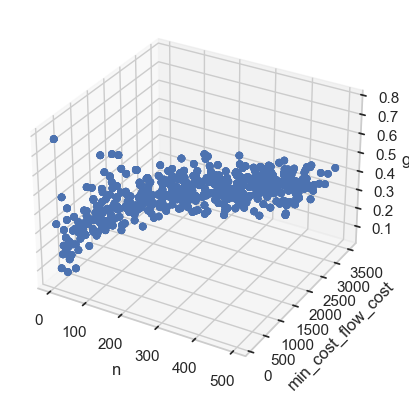

In [43]:
# Add a regression plane

import numpy as np

np.float = np.float64

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import make_pipeline

#reset axes

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(ad_hoc_solutions["n"], ad_hoc_solutions["min_cost_flow_cost"], ad_hoc_solutions["gap"])

ax.set_xlabel('n')

ax.set_ylabel('min_cost_flow_cost')

ax.set_zlabel('gap')

# model.fit(X, y)

# Input contains NaN, infinity or a value too large for dtype('float64').

# To fix this, we can cap the max value of X


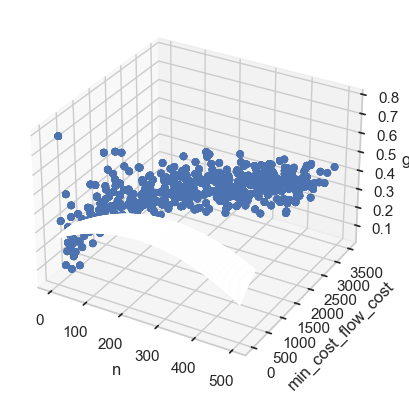

In [44]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(ad_hoc_solutions["n"], ad_hoc_solutions["min_cost_flow_cost"], ad_hoc_solutions["gap"])

ax.set_xlabel('n')

ax.set_ylabel('min_cost_flow_cost')

ax.set_zlabel('gap')

# Add a regression plane

X = ad_hoc_solutions[["n", "min_cost_flow_cost"]]
y = ad_hoc_solutions["gap"]

model = make_pipeline(PolynomialFeatures(2), LinearRegression())

model.fit(X, y)

xx, yy = np.meshgrid(np.linspace(0, 500, 100), np.linspace(0, 500, 100))

zz = np.array([xx.flatten(), yy.flatten()]).T

zz = model.predict(zz)

zz = zz.reshape(xx.shape)

ax.plot_surface(xx, yy, zz, color="blue", alpha=0.5)

### Comparación de tiempos de ejecución

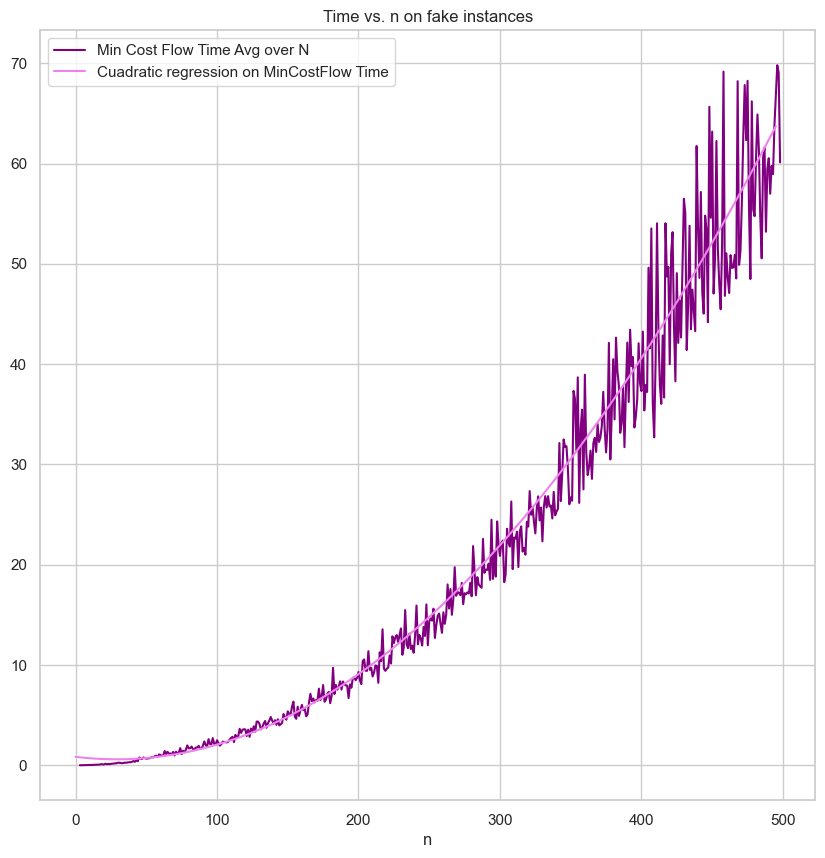

In [46]:
# Analisis de tiempo de ejecucion

ad_hoc_solutions["greedy_time"] = ad_hoc_solutions["greedy_time"].apply(lambda x: float(x))
ad_hoc_solutions["min_cost_flow_time"] = ad_hoc_solutions["min_cost_flow_time"].apply(lambda x: float(x))

# Plot time vs. n

fig, ax = plt.subplots(figsize=(10, 10))

greedy_times = ad_hoc_solutions.groupby("n")[["greedy_time"]].mean()
min_cost_flow_times = ad_hoc_solutions.groupby("n")[["min_cost_flow_time"]].mean()

""" 
ax.plot(greedy_times,
        color="teal",
        label="Greedy Time Avg over N")
 """

ax.plot(min_cost_flow_times,
        color="purple",
        label="Min Cost Flow Time Avg over N")


# Cuadratic regression of min_cost_flow_time

exp_reg = np.poly1d(np.polyfit(min_cost_flow_times.index, min_cost_flow_times["min_cost_flow_time"], 2))

exp_reg_vals = exp_reg(min_cost_flow_times.index)

ax.plot(exp_reg_vals, 
        color="Violet", 
        label="Cuadratic regression on MinCostFlow Time")

ax.set_title("Time vs. n on fake instances")
ax.set_xlabel("n")

_ = ax.legend()

plt.savefig("../output/figures/time_vs_n_mincostflow_fake_scatter.png")

# Plot time vs. n


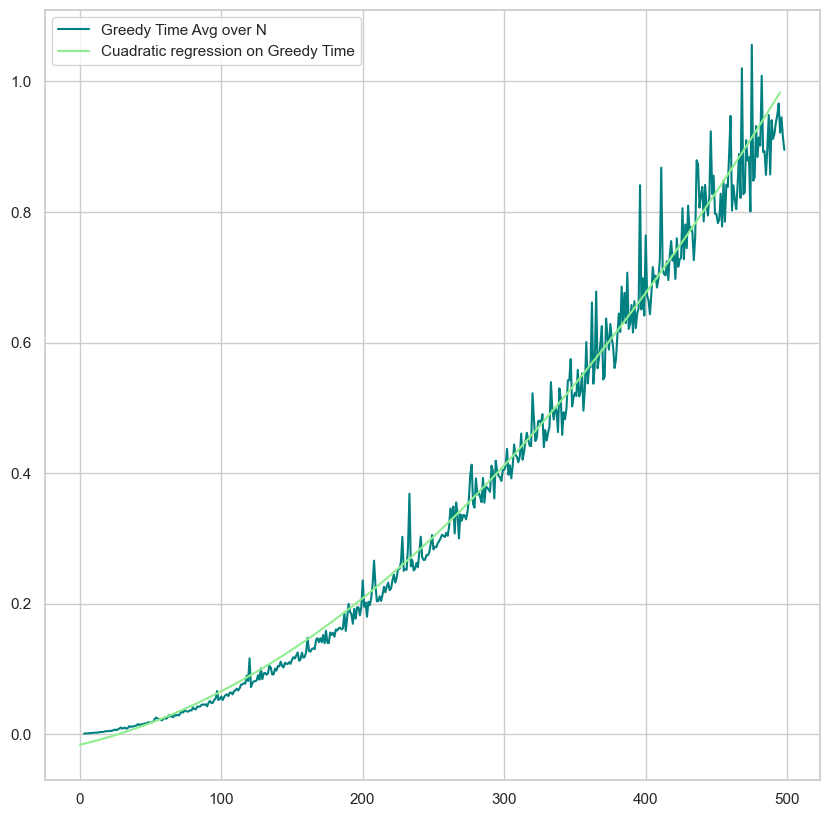

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.plot(greedy_times,
        color="teal",
        label="Greedy Time Avg over N")

# Cuadratic regression of greedy_time

reg = np.poly1d(np.polyfit(greedy_times.index, greedy_times["greedy_time"], 2))

reg_vals = reg(greedy_times.index)

ax.plot(reg_vals,
        color="lightgreen",
        label="Cuadratic regression on Greedy Time")

_ = ax.legend(loc="upper left")

plt.savefig("../output/figures/time_vs_n_greedy_fake_scatter.png")

Greedy min time:  0.000917
Greedy max time:  2.67908
Batching min time:  0.01725
Batching max time:  129.892
Greedy mean time:  0.35993735524193554
Greedy std time:  0.3041308440122765
Batching mean time:  20.44224562701613
Batching std time:  19.385825858008126


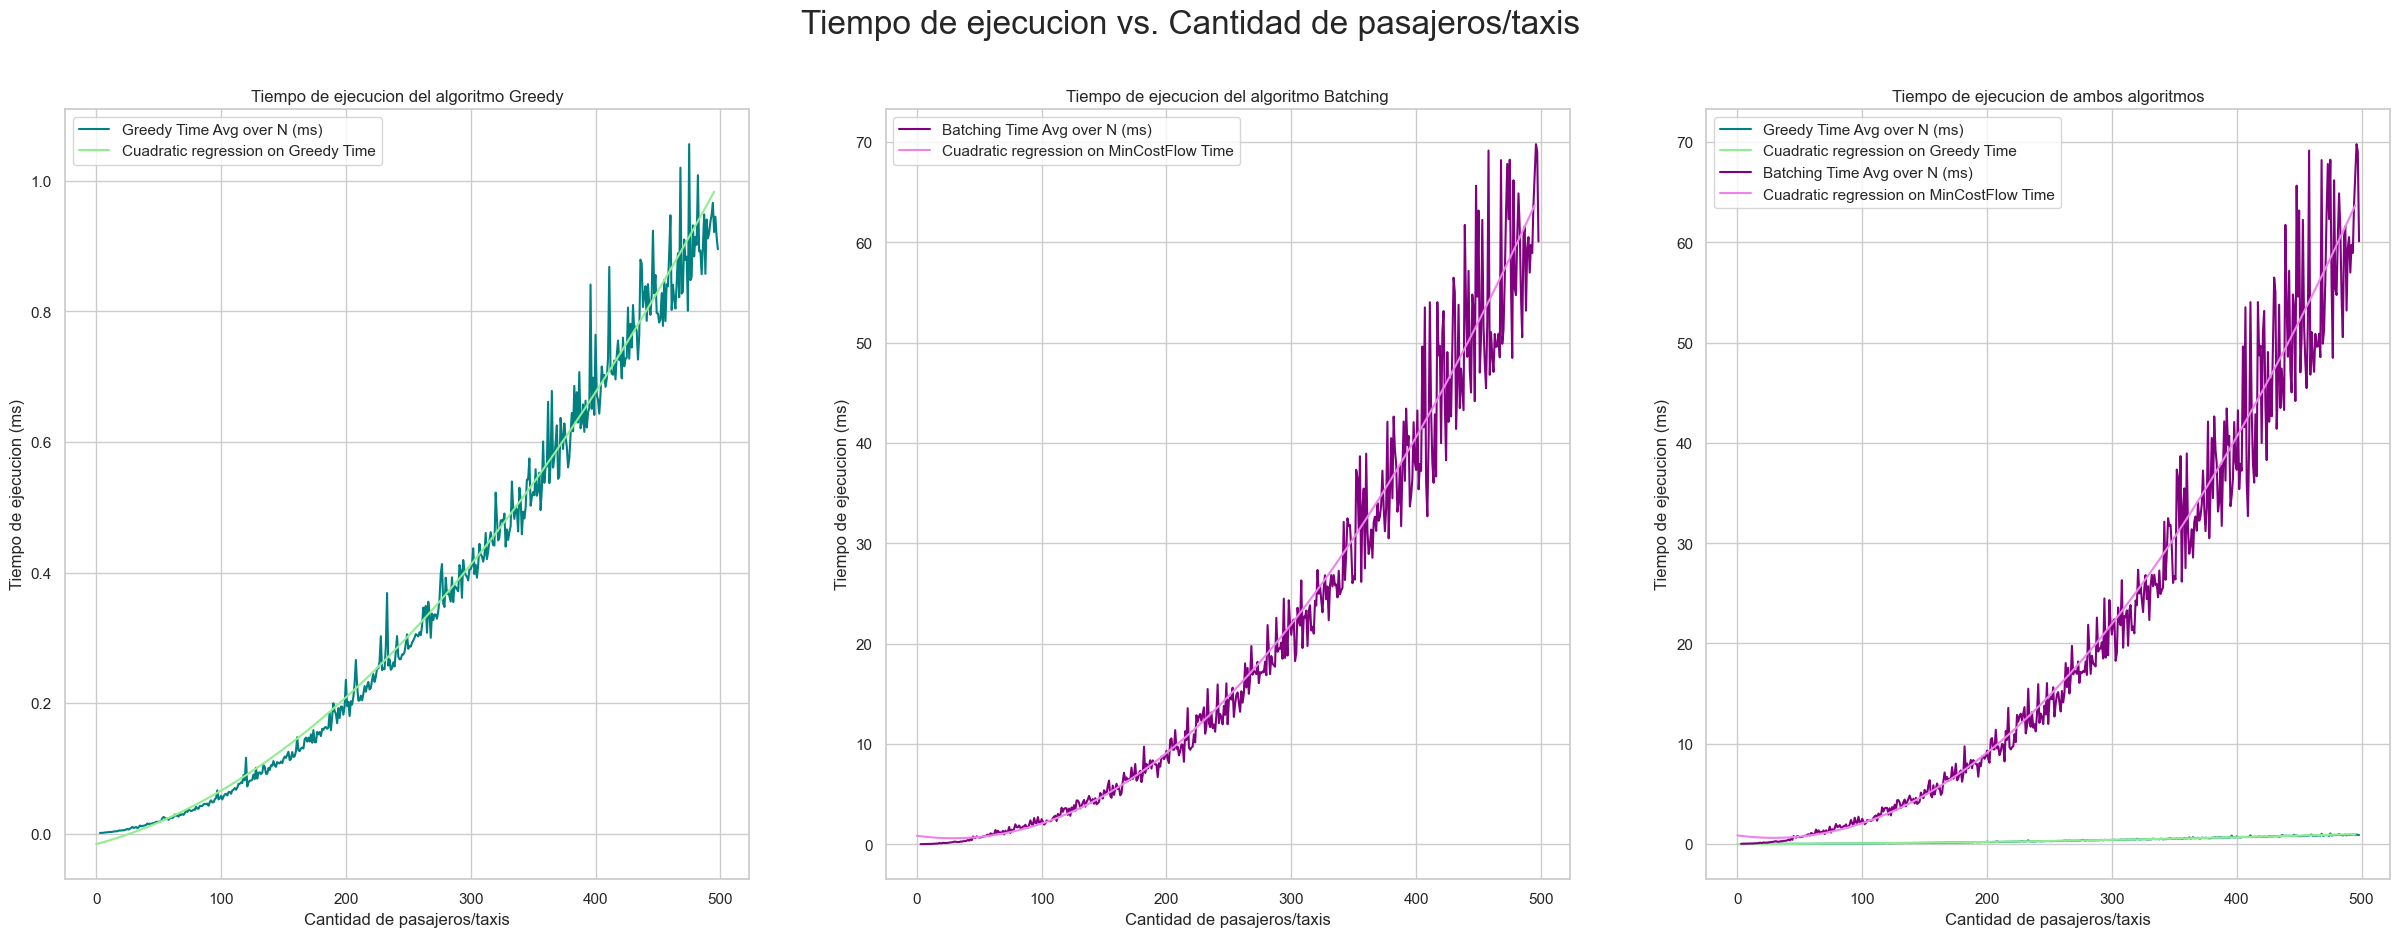

In [49]:
fit, axs = plt.subplots(1, 3, figsize=(30, 10))

axs[0].plot(greedy_times,
        color="teal",
        label="Greedy Time Avg over N (ms)")

axs[0].plot(reg_vals,
        color="lightgreen",
        label="Cuadratic regression on Greedy Time")

axs[0].legend(loc="upper left")

axs[0].set_xlabel("Cantidad de pasajeros/taxis")
axs[0].set_ylabel("Tiempo de ejecucion (ms)")

axs[0].set_title("Tiempo de ejecucion del algoritmo Greedy")

axs[1].plot(min_cost_flow_times,
        color="purple",
        label="Batching Time Avg over N (ms)")

axs[1].plot(exp_reg_vals,
        color="Violet",
        label="Cuadratic regression on MinCostFlow Time")

axs[1].legend()

axs[1].set_xlabel("Cantidad de pasajeros/taxis")
axs[1].set_ylabel("Tiempo de ejecucion (ms)")

axs[1].set_title("Tiempo de ejecucion del algoritmo Batching")

axs[2].plot(greedy_times,
        color="teal",
        label="Greedy Time Avg over N (ms)")

axs[2].plot(reg_vals,
        color="lightgreen",
        label="Cuadratic regression on Greedy Time")

axs[2].plot(min_cost_flow_times,
        color="purple",
        label="Batching Time Avg over N (ms)")

axs[2].plot(exp_reg_vals,
        color="Violet",
        label="Cuadratic regression on MinCostFlow Time")

axs[2].legend()

axs[2].set_xlabel("Cantidad de pasajeros/taxis")
axs[2].set_ylabel("Tiempo de ejecucion (ms)")

axs[2].set_title("Tiempo de ejecucion de ambos algoritmos")

plt.suptitle("Tiempo de ejecucion vs. Cantidad de pasajeros/taxis", fontsize=24)

# print min max values of greedy and min_cost_flow

print("Greedy min time: ", ad_hoc_solutions["greedy_time"].min())
print("Greedy max time: ", ad_hoc_solutions["greedy_time"].max())

print("Batching min time: ", ad_hoc_solutions["min_cost_flow_time"].min())
print("Batching max time: ", ad_hoc_solutions["min_cost_flow_time"].max())

# Print mean min max values of greedy and min_cost_flow

print("Greedy mean time: ", ad_hoc_solutions["greedy_time"].mean())
print("Greedy std time: ", ad_hoc_solutions["greedy_time"].std())

print("Batching mean time: ", ad_hoc_solutions["min_cost_flow_time"].mean())
print("Batching std time: ", ad_hoc_solutions["min_cost_flow_time"].std())

plt.savefig("../output/figures/greedy_vs_batching_time.png")

## Taxi Priority

In [50]:
taxi_priorities_og = pd.read_csv("../output/taxi_priorities_original.csv")
taxi_priorities_og.describe()


n  avg_priority_ratio  avg_min_cost_flow_ratio  \
count   40.000000           40.000000                40.000000   
mean   215.000000           82.983092               163.930615   
std    187.903412           47.295148                50.666982   
min     10.000000           44.190100                86.093600   
25%     77.500000           58.235675               139.775500   
50%    175.000000           67.875000               150.465500   
75%    312.500000           85.760425               178.405500   
max    500.000000          264.085000               373.980000   

       avg_greedy_ratio  
count         40.000000  
mean         199.389650  
std           70.477647  
min          108.345000  
25%          156.981250  
50%          176.264500  
75%          212.591250  
max          433.235000

Text(0.5, 0.98, 'Comparacion de Costo de Taxistas vs. Cantidad de pasajeros/taxis en Instancias Originales')

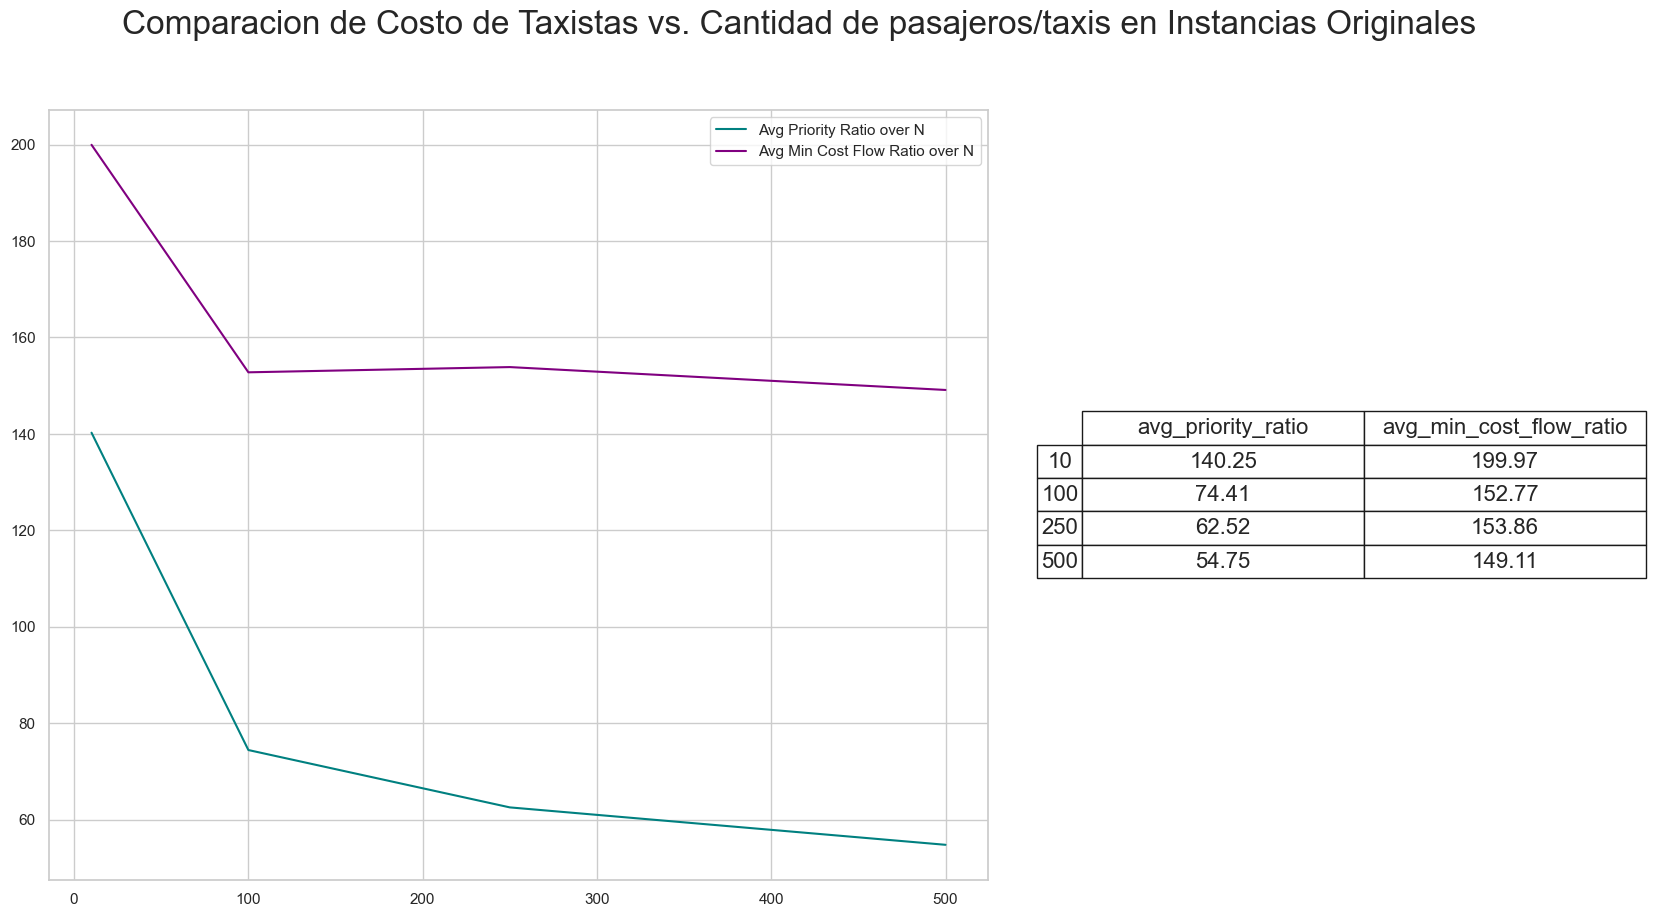

In [51]:
# plot taxi priorities avg_priority_ratio vs avg_min_cost_flow_ratio
# group by n

taxi_priorities_og["avg_priority_ratio"] = taxi_priorities_og["avg_priority_ratio"].apply(lambda x: float(x))
taxi_priorities_og["avg_min_cost_flow_ratio"] = taxi_priorities_og["avg_min_cost_flow_ratio"].apply(lambda x: float(x))

fig, axs = plt.subplots(1, 2, figsize=(20, 10), width_ratios=[2, 1])

_ = axs[0].plot(taxi_priorities_og.groupby("n")[["avg_priority_ratio"]].mean(),
        color="teal",
        label="Avg Priority Ratio over N")

_ = axs[0].plot(taxi_priorities_og.groupby("n")[["avg_min_cost_flow_ratio"]].mean(),
        color="purple",
        label="Avg Min Cost Flow Ratio over N")

_ = axs[0].legend()

# Table with avg_priority_ratio and avg_min_cost_flow_ratio grouped by n

mean_taxi_pri = taxi_priorities_og.groupby("n")[["avg_priority_ratio", "avg_min_cost_flow_ratio"]].mean().round(2)


t = axs[1].table(
        cellText=mean_taxi_pri.values,
        rowLabels=mean_taxi_pri.index,
        colLabels=mean_taxi_pri.columns,
        loc="center",
        colWidths=[0.6] * len(mean_taxi_pri.columns),
        cellLoc="center",
        rowLoc="center",
        #cellColours= [["#56b5fd" if i % 2 == 0 else "#AAAAFF"] for i in range(len(mean_taxi_pri.columns))],
)

t.auto_set_font_size(False)
t.set_fontsize(16)
t.scale(1, 2)
_ = axs[1].axis("off")

fig.suptitle("Comparacion de Costo de Taxistas vs. Cantidad de pasajeros/taxis en Instancias Originales", fontsize=24)

#plt.savefig("../output/figures/taxi_priorities_original.png")

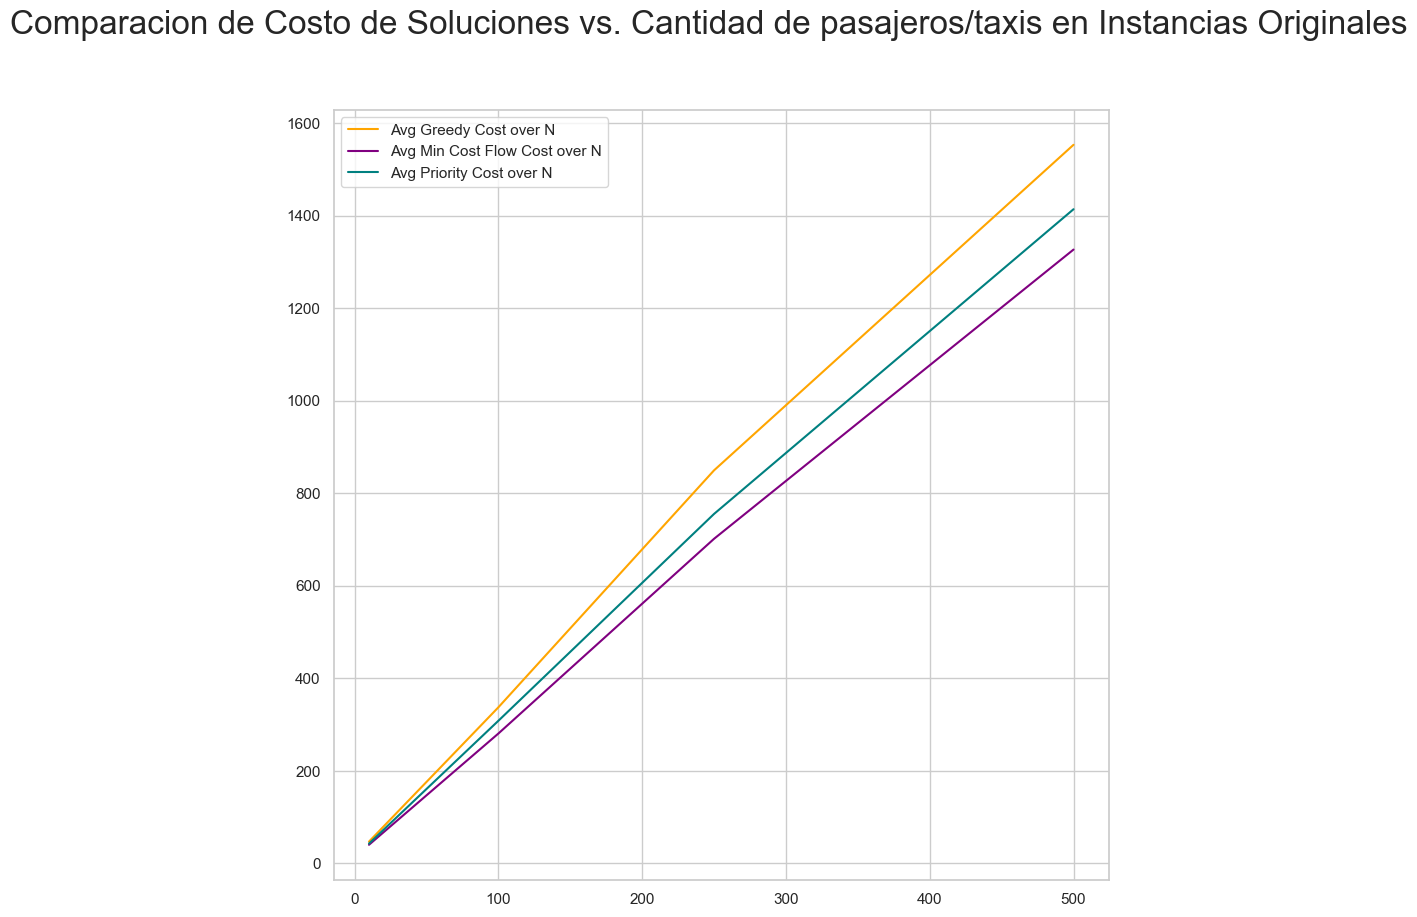

In [52]:
# plot from solutions, greedy_cost vs min_cost_flow_cost vs priority_cost

solutions["greedy_cost"] = solutions["greedy_cost"].apply(lambda x: float(x))
solutions["min_cost_flow_cost"] = solutions["min_cost_flow_cost"].apply(lambda x: float(x))
solutions["priority_cost"] = solutions["priority_cost"].apply(lambda x: float(x))

fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.plot(solutions.groupby("n")[["greedy_cost"]].mean(),
        color="orange",
        label="Avg Greedy Cost over N")

_ = ax.plot(solutions.groupby("n")[["min_cost_flow_cost"]].mean(),
        color="purple",
        label="Avg Min Cost Flow Cost over N")

_ = ax.plot(solutions.groupby("n")[["priority_cost"]].mean(),
        color="teal",
        label="Avg Priority Cost over N")

_ = ax.legend()

fig.suptitle("Comparacion de Costo de Soluciones vs. Cantidad de pasajeros/taxis en Instancias Originales", fontsize=24)

plt.savefig("../output/figures/solutions_original.png")

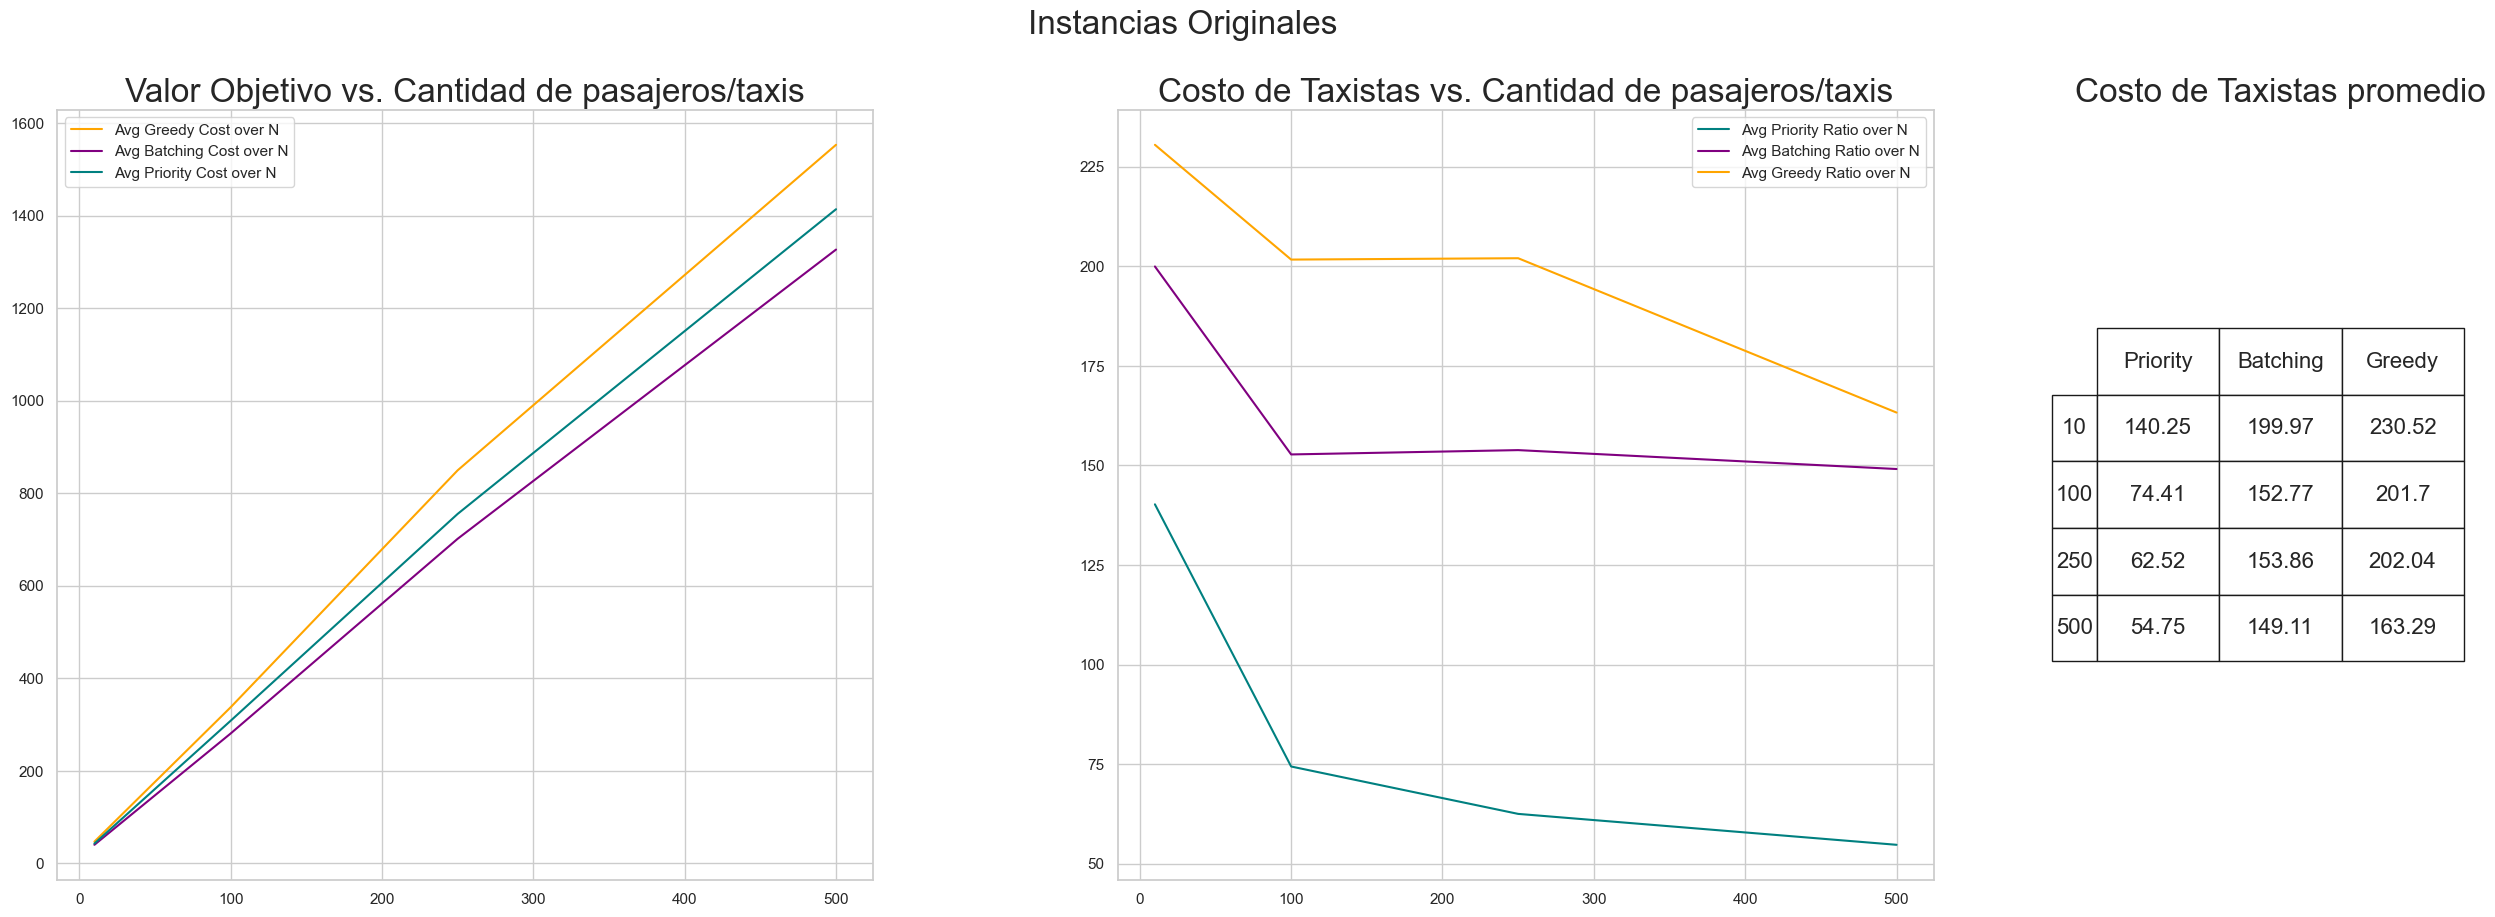

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10), width_ratios=[4, 4, 1])

_ = axs[0].plot(solutions.groupby("n")[["greedy_cost"]].mean(),
        color="orange",
        label="Avg Greedy Cost over N")

_ = axs[0].plot(solutions.groupby("n")[["min_cost_flow_cost"]].mean(),
        color="purple",
        label="Avg Batching Cost over N")

_ = axs[0].plot(solutions.groupby("n")[["priority_cost"]].mean(),
        color="teal",
        label="Avg Priority Cost over N")

_ = axs[0].legend()

_ = axs[1].plot(taxi_priorities_og.groupby("n")[["avg_priority_ratio"]].mean(),
        color="teal",
        label="Avg Priority Ratio over N")

_ = axs[1].plot(taxi_priorities_og.groupby("n")[["avg_min_cost_flow_ratio"]].mean(),
        color="purple",
        label="Avg Batching Ratio over N")

_ = axs[1].plot(taxi_priorities_og.groupby("n")[["avg_greedy_ratio"]].mean(),
        color="orange",
        label="Avg Greedy Ratio over N")

_ = axs[1].legend()

# Table with avg_priority_ratio and avg_min_cost_flow_ratio grouped by n

mean_taxi_pri = taxi_priorities_og.groupby("n")[["avg_priority_ratio", "avg_min_cost_flow_ratio", "avg_greedy_ratio"]].mean().round(2)

mean_taxi_pri.columns = ["Priority", "Batching", "Greedy"]

t = axs[2].table(
        cellText=mean_taxi_pri.values,
        rowLabels=mean_taxi_pri.index,
        colLabels=mean_taxi_pri.columns,
        loc="center",
        colWidths=[0.6] * len(mean_taxi_pri.columns),
        cellLoc="center",
        rowLoc="center",
        #cellColours= [["#56b5fd" if i % 2 == 0 else "#AAAAFF"] for i in range(len(mean_taxi_pri.columns))],
)

t.auto_set_font_size(False)
t.set_fontsize(16)
t.scale(1, 4)
_ = axs[2].axis("off")


axs[0].set_title("Valor Objetivo vs. Cantidad de pasajeros/taxis", fontsize=24)
axs[1].set_title("Costo de Taxistas vs. Cantidad de pasajeros/taxis", fontsize=24)
axs[2].set_title("Costo de Taxistas promedio", fontsize=24)

# set space between plots

fig.subplots_adjust(wspace=0.4)

fig.suptitle("Instancias Originales", fontsize=24)

plt.savefig("../output/figures/results_combined_original.png")


In [54]:
taxi_priorities_rand = pd.read_csv("../output/fake/taxi_priorities_random.csv")

taxi_priorities_rand["avg_priority_ratio"] = taxi_priorities_rand["avg_priority_ratio"].apply(lambda x: float(x))
taxi_priorities_rand["avg_min_cost_flow_ratio"] = taxi_priorities_rand["avg_min_cost_flow_ratio"].apply(lambda x: float(x))
taxi_priorities_rand["avg_greedy_ratio"] = taxi_priorities_rand["avg_greedy_ratio"].apply(lambda x: float(x))

taxi_priorities_rand.describe()

n  avg_priority_ratio  avg_min_cost_flow_ratio  \
count  4960.000000         4960.000000              4960.000000   
mean    250.500000           67.395563                98.696155   
std     143.197012          232.789721               255.776086   
min       3.000000           13.916200                18.571100   
25%     126.750000           24.974900                37.601125   
50%     250.500000           32.462850                52.413400   
75%     374.250000           52.104275                79.003725   
max     498.000000         4630.790000              4777.720000   

       avg_greedy_ratio  
count       4960.000000  
mean         137.109841  
std          338.082502  
min           24.875100  
25%           51.104400  
50%           68.219650  
75%          110.616750  
max         4729.550000

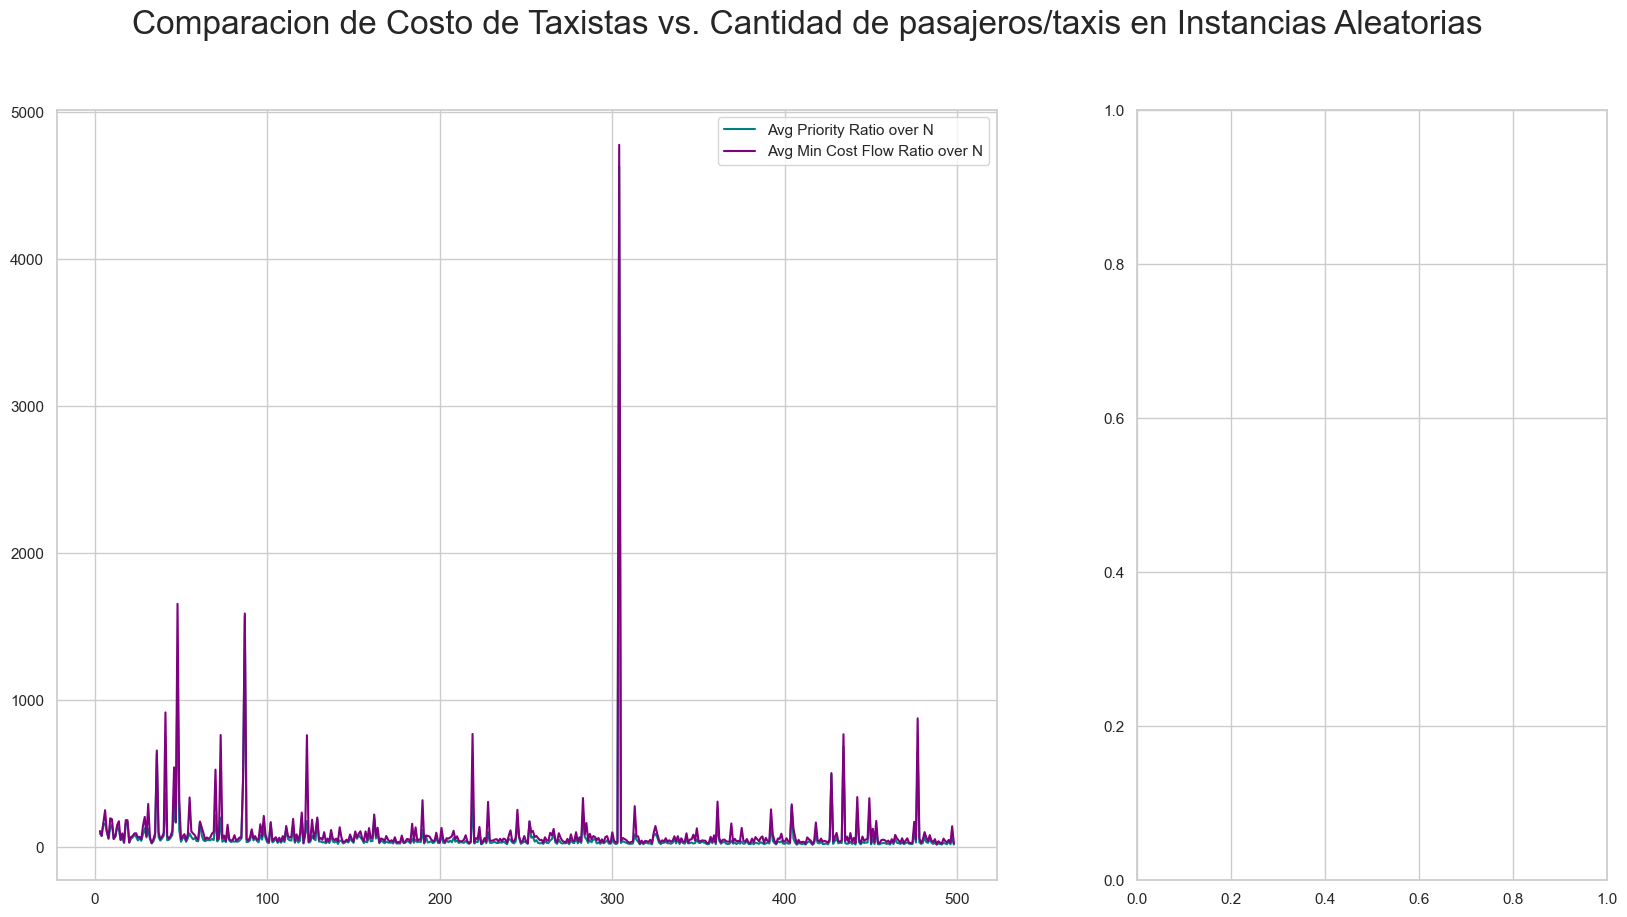

In [55]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), width_ratios=[2, 1])

_ = axs[0].plot(taxi_priorities_rand.groupby("n")[["avg_priority_ratio"]].mean(),
        color="teal",
        label="Avg Priority Ratio over N")

_ = axs[0].plot(taxi_priorities_rand.groupby("n")[["avg_min_cost_flow_ratio"]].mean(),
        color="purple",
        label="Avg Min Cost Flow Ratio over N")

_ = axs[0].legend()

# Table with avg_priority_ratio and avg_min_cost_flow_ratio grouped by n

mean_taxi_pri_rand = taxi_priorities_rand.groupby("n")[["avg_priority_ratio", "avg_min_cost_flow_ratio"]].mean().round(2)

""" t = axs[1].table(
        cellText=mean_taxi_pri_rand.values,
        rowLabels=mean_taxi_pri_rand.index,
        colLabels=mean_taxi_pri_rand.columns,
        loc="center",
        colWidths=[0.6] * len(mean_taxi_pri_rand.columns),
        cellLoc="center",
        rowLoc="center",
        #cellColours= [["#56b5fd" if i % 2 == 0 else "#AAAAFF"] for i in range(len(mean_taxi_pri.columns))],
)

t.auto_set_font_size(False)
t.set_fontsize(16)
t.scale(1, 2) """

fig.suptitle("Comparacion de Costo de Taxistas vs. Cantidad de pasajeros/taxis en Instancias Aleatorias", fontsize=24)

plt.savefig("../output/figures/taxi_priorities_random.png")

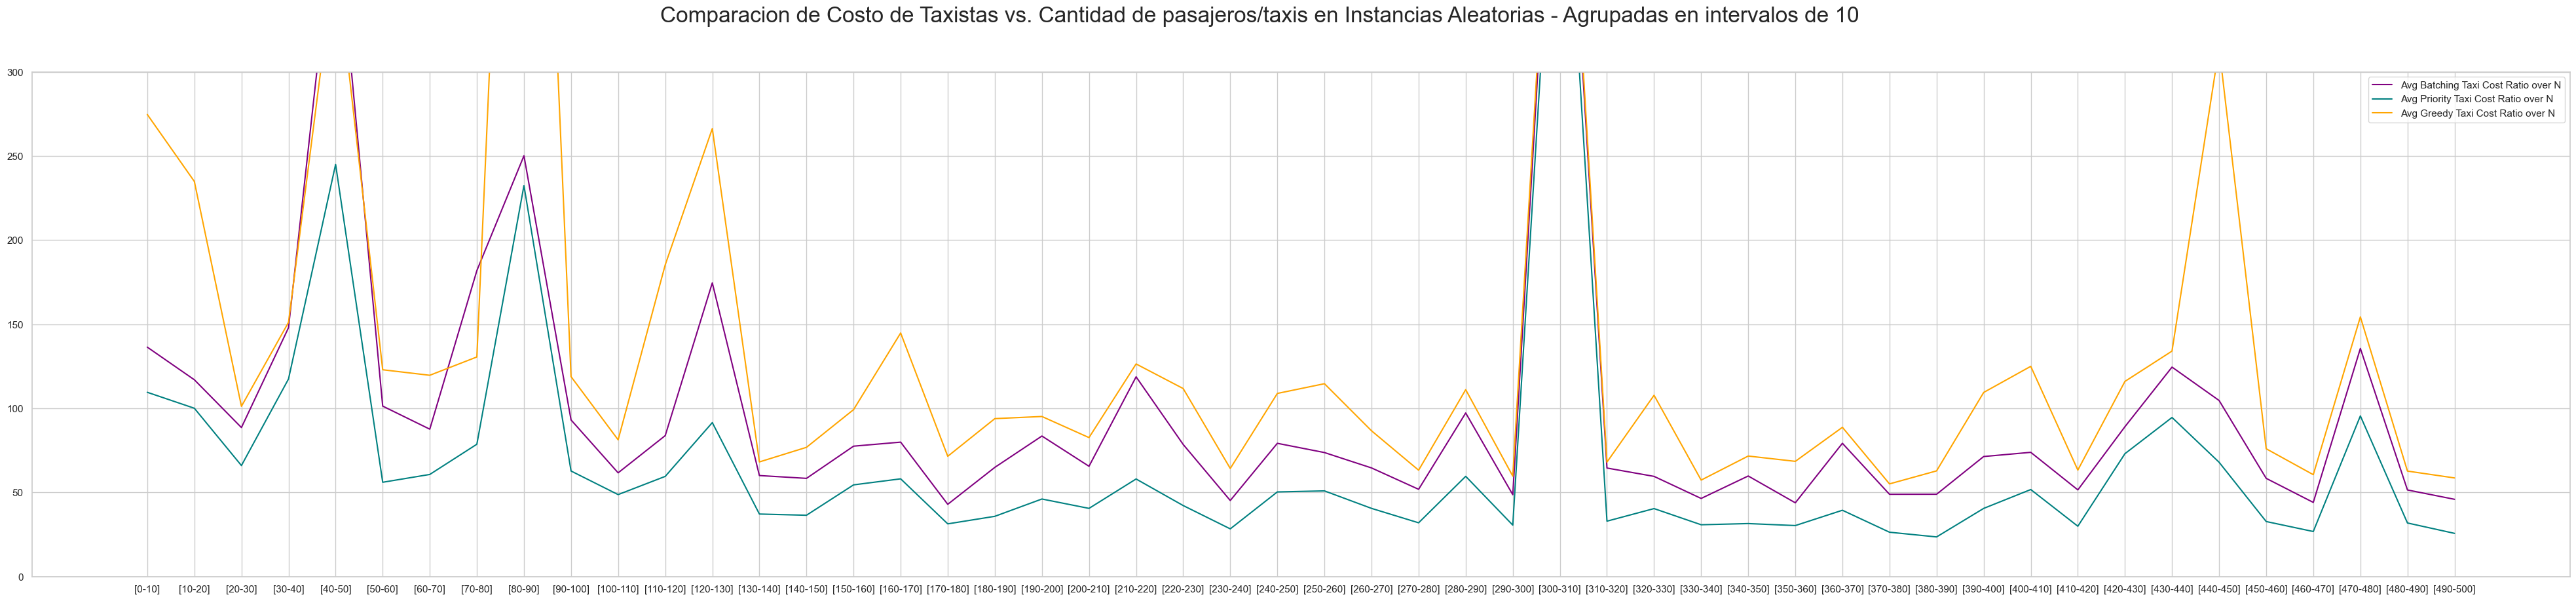

In [57]:
# Bar plot with avg_priority_ratio and avg_min_cost_flow_ratio grouped by n

fig, ax = plt.subplots(figsize=(50, 10))

# Group in batches of 50

taxi_priorities_rand["batch"] = taxi_priorities_rand["n"].apply(lambda x: x // 10)


_ = ax.plot(taxi_priorities_rand.groupby("batch")[["avg_min_cost_flow_ratio"]].mean(),
        color="purple",
        label="Avg Batching Taxi Cost Ratio over N")

_ = ax.plot(taxi_priorities_rand.groupby("batch")[["avg_priority_ratio"]].mean(),
        color="teal",
        label="Avg Priority Taxi Cost Ratio over N")


_ = ax.plot(taxi_priorities_rand.groupby("batch")[["avg_greedy_ratio"]].mean(),
        color="orange",
        label="Avg Greedy Taxi Cost Ratio over N")

_ = ax.legend()

# set y domain to 0-500

#_ = ax.set_ylim(20, 50)

# setear xticks a [0-10], [10-20], [20-30], etc
# [f"[{i}-{i+10}]" for i in range(0, 500, 10)]

_ = ax.set_xticks(range(0, 50, 1))

_ = ax.set_xticklabels([f"[{i}-{i+10}]" for i in range(0, 500, 10)])

# ylim 0-300

_ = ax.set_ylim(0, 300)

fig.suptitle("Comparacion de Costo de Taxistas vs. Cantidad de pasajeros/taxis en Instancias Aleatorias - Agrupadas en intervalos de 10", fontsize=24)

plt.savefig("../output/figures/taxi_priorities_random_grouped.png")

Text(0.5, 0.98, 'Comparacion de Valor Objetivo vs. Cantidad de pasajeros/taxis en Instancias Aleatorias')

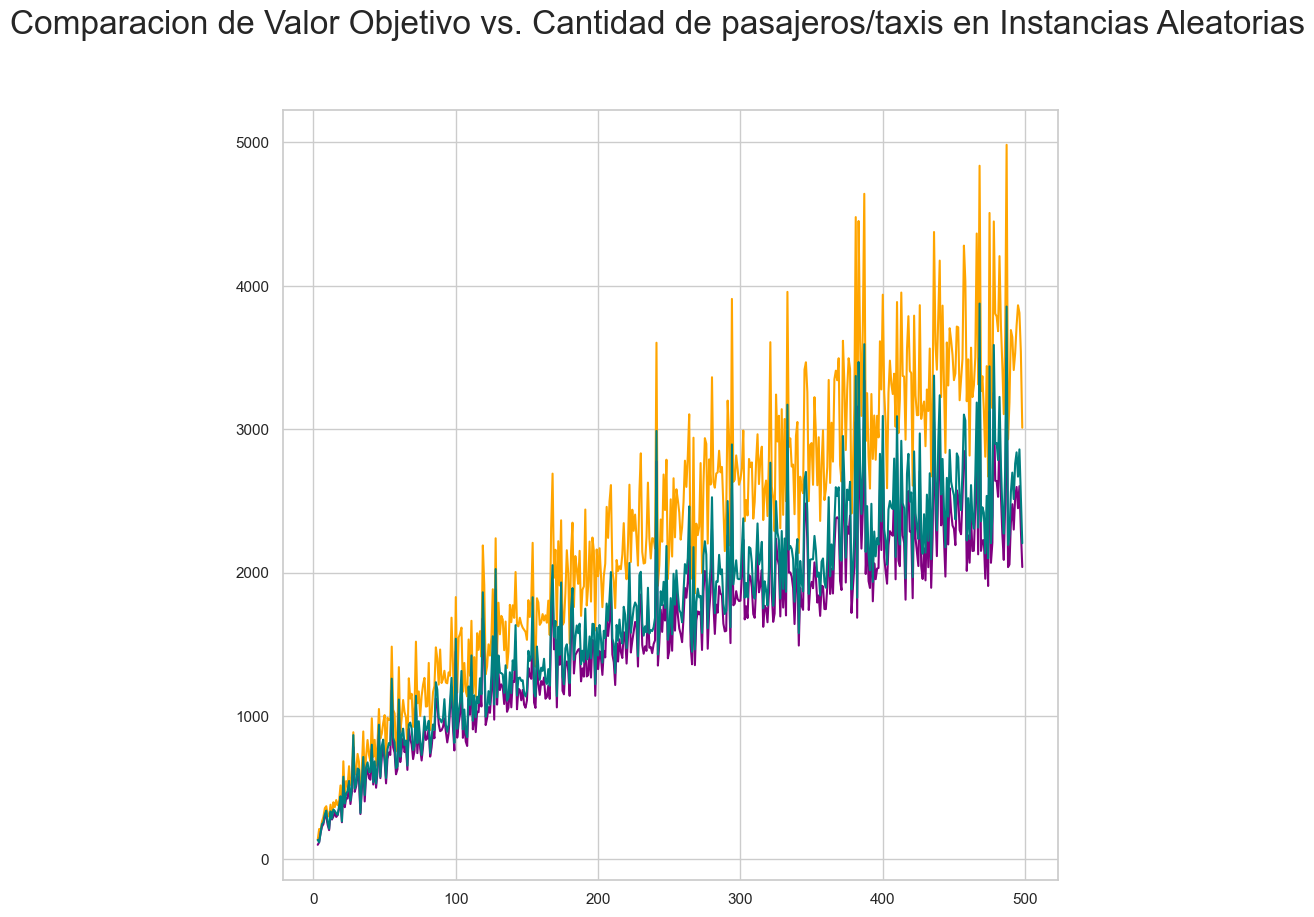

In [563]:
ad_hoc_solutions["greedy_cost"] = ad_hoc_solutions["greedy_cost"].apply(lambda x: float(x))
ad_hoc_solutions["min_cost_flow_cost"] = ad_hoc_solutions["min_cost_flow_cost"].apply(lambda x: float(x))
ad_hoc_solutions["priority_cost"] = ad_hoc_solutions["priority_cost"].apply(lambda x: float(x))

fig, ax = plt.subplots(figsize=(10, 10))

_ = ax.plot(ad_hoc_solutions.groupby("n")[["greedy_cost"]].mean(),
        color="orange",
        label="Avg Greedy Cost over N")

_ = ax.plot(ad_hoc_solutions.groupby("n")[["min_cost_flow_cost"]].mean(),
        color="purple",
        label="Avg Min Cost Flow Cost over N")

_ = ax.plot(ad_hoc_solutions.groupby("n")[["priority_cost"]].mean(),
        color="teal",
        label="Avg Priority Cost over N") 
    
fig.suptitle("Comparacion de Valor Objetivo vs. Cantidad de pasajeros/taxis en Instancias Aleatorias", fontsize=24)

#plt.savefig("../output/figures/solutions_random.png")

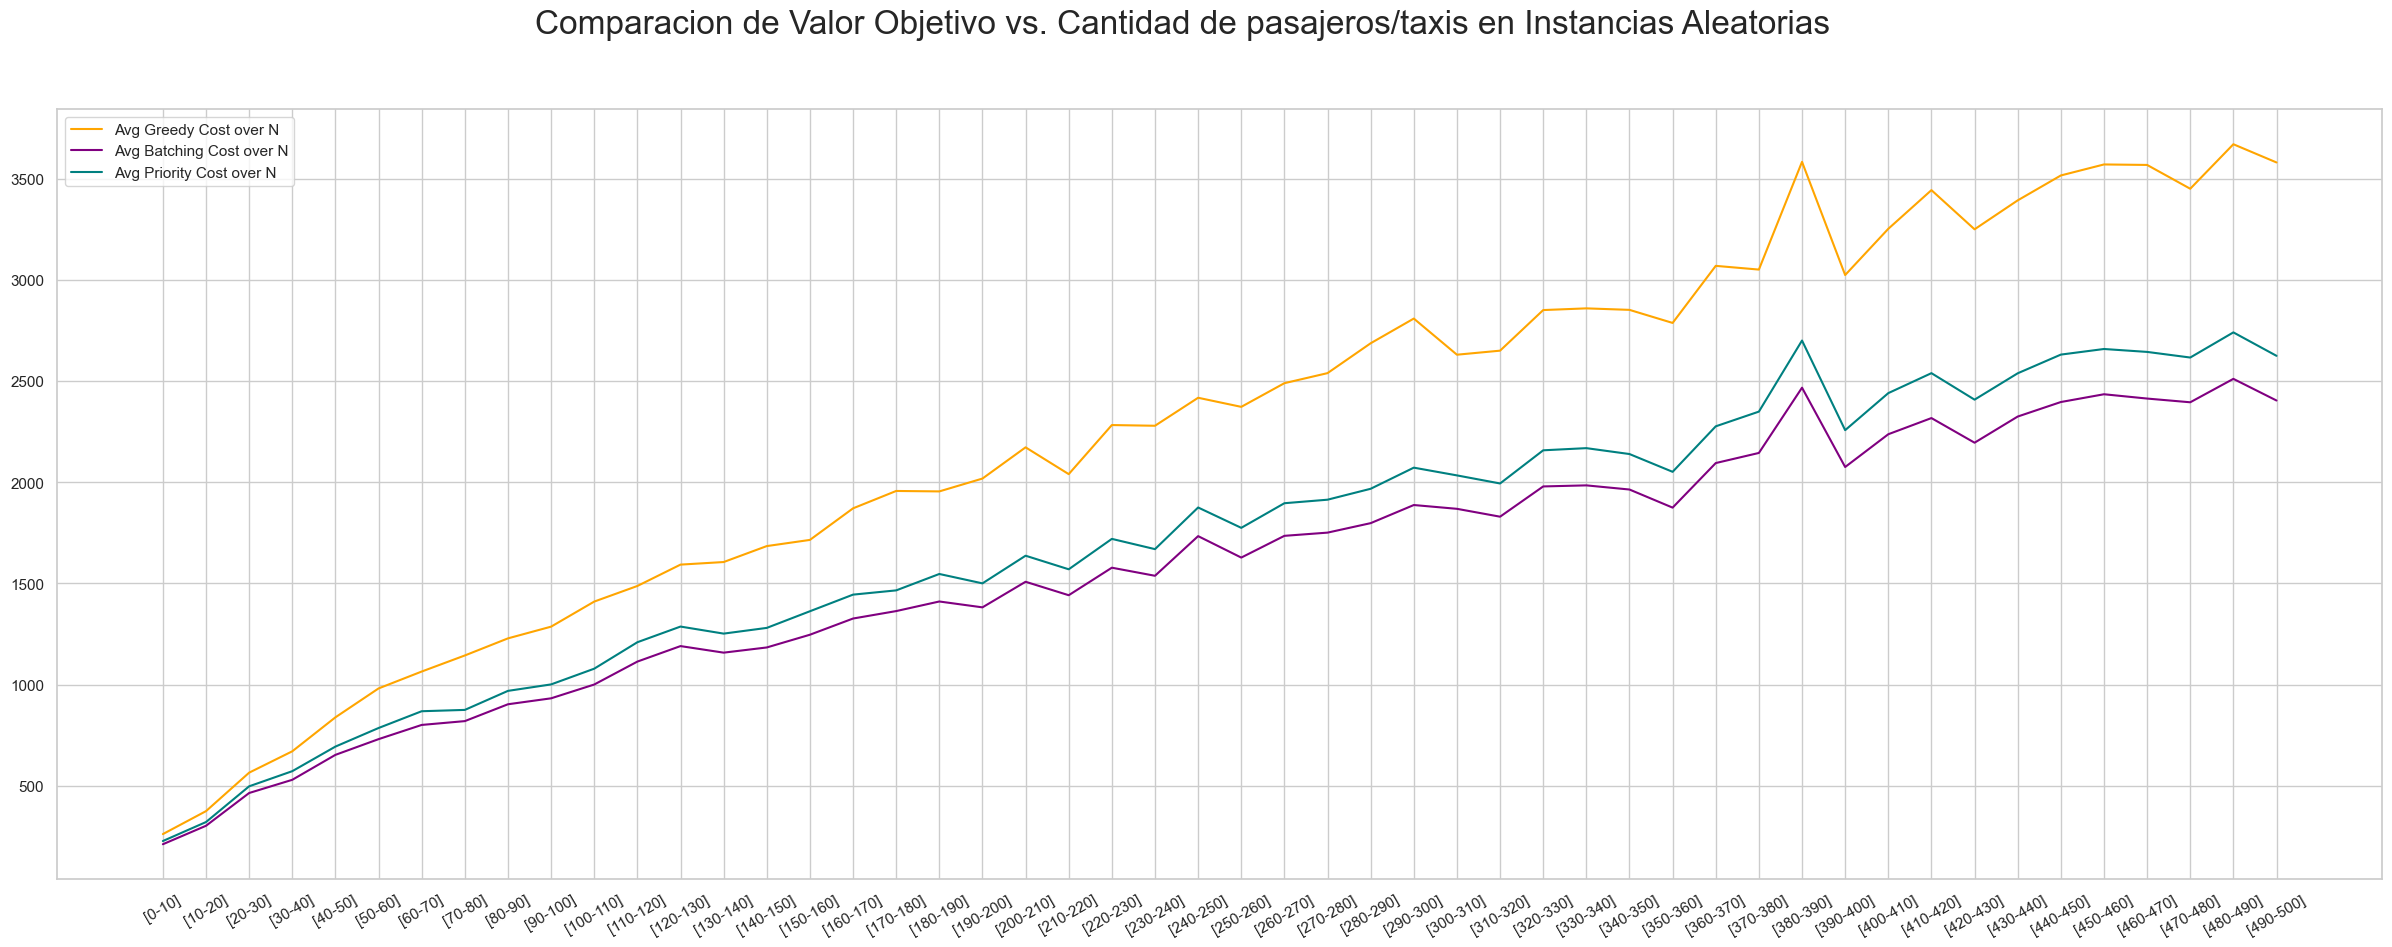

In [58]:

fig, ax = plt.subplots(figsize=(30, 10))

# batch by 10

ad_hoc_solutions["batch"] = ad_hoc_solutions["n"].apply(lambda x: x // 10)

_ = ax.plot(ad_hoc_solutions.groupby("batch")[["greedy_cost"]].mean(),
        color="orange",
        label="Avg Greedy Cost over N")

_ = ax.plot(ad_hoc_solutions.groupby("batch")[["min_cost_flow_cost"]].mean(),
        color="purple",
        label="Avg Batching Cost over N")

_ = ax.plot(ad_hoc_solutions.groupby("batch")[["priority_cost"]].mean(),
        color="teal",
        label="Avg Priority Cost over N") 
    
ax.set_xticks(range(0, 50, 1))
ax.set_xticklabels([f"[{i}-{i+10}]" for i in range(0, 500, 10)])

#rotate xticks

for tick in ax.get_xticklabels():
        tick.set_rotation(30)

_ = ax.legend()

fig.suptitle("Comparacion de Valor Objetivo vs. Cantidad de pasajeros/taxis en Instancias Aleatorias", fontsize=24)

plt.savefig("../output/figures/solutions_random.png")

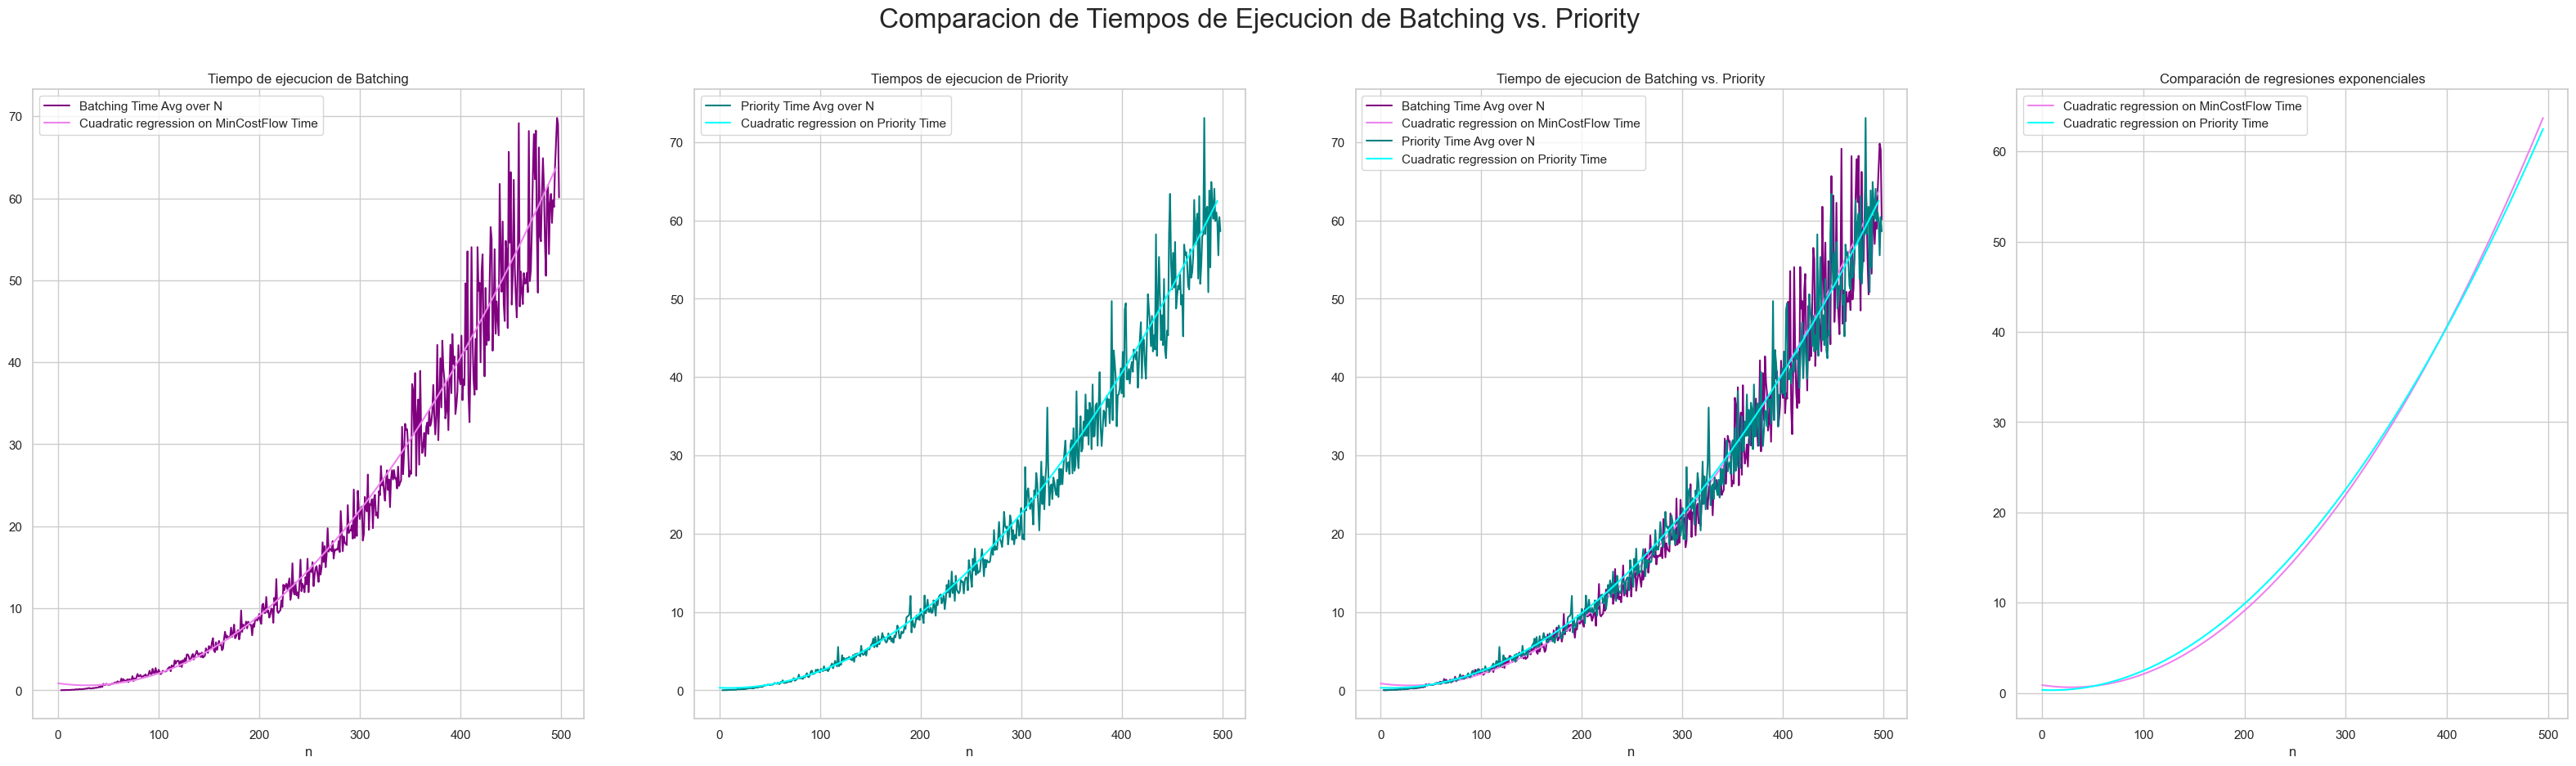

In [59]:
# Comparación temporal de soluciones Prioridad vs. Batching

# Analisis de tiempo de ejecucion

ad_hoc_solutions["priority_time"] = ad_hoc_solutions["priority_time"].apply(lambda x: float(x))
ad_hoc_solutions["min_cost_flow_time"] = ad_hoc_solutions["min_cost_flow_time"].apply(lambda x: float(x))

# Plot time vs. n

fig, axs = plt.subplots(1, 4, figsize=(40, 10))

min_cost_flow_times = ad_hoc_solutions.groupby("n")[["min_cost_flow_time"]].mean()
priority_times = ad_hoc_solutions.groupby("n")[["priority_time"]].mean()

""" 
ax.plot(greedy_times,
        color="teal",
        label="Greedy Time Avg over N")
 """

axs[0].plot(min_cost_flow_times,
        color="purple",
        label="Batching Time Avg over N")

# Cuadratic regression of min_cost_flow_time

exp_reg = np.poly1d(np.polyfit(min_cost_flow_times.index, min_cost_flow_times["min_cost_flow_time"], 2))

exp_reg_vals = exp_reg(min_cost_flow_times.index)

axs[0].plot(exp_reg_vals, 
        color="Violet", 
        label="Cuadratic regression on MinCostFlow Time")

axs[0].set_title("Tiempo de ejecucion de Batching")
axs[0].set_xlabel("n")

_ = axs[0].legend()

axs[1].plot(priority_times,
        color="teal",
        label="Priority Time Avg over N")

# Cuadratic regression of priority_time

exp_reg_pri = np.poly1d(np.polyfit(priority_times.index, priority_times["priority_time"], 2))
exp_reg_pri_vals = exp_reg_pri(priority_times.index)

axs[1].plot(exp_reg_pri_vals,
        color="cyan",
        label="Cuadratic regression on Priority Time")

axs[1].set_title("Tiempos de ejecucion de Priority")

axs[1].set_xlabel("n")

_ = axs[1].legend()


axs[2].plot(min_cost_flow_times,
        color="purple",
        label="Batching Time Avg over N")

axs[2].plot(exp_reg_vals,
        color="Violet",
        label="Cuadratic regression on MinCostFlow Time")

axs[2].plot(priority_times,
        color="teal",
        label="Priority Time Avg over N")

axs[2].plot(exp_reg_pri_vals,
        color="cyan",
        label="Cuadratic regression on Priority Time")

axs[2].set_title("Tiempo de ejecucion de Batching vs. Priority")

axs[2].set_xlabel("n")

_ = axs[2].legend()


axs[3].plot(exp_reg_vals,
        color="Violet",
        label="Cuadratic regression on MinCostFlow Time")

axs[3].plot(exp_reg_pri_vals,
        color="cyan",
        label="Cuadratic regression on Priority Time")

axs[3].set_title("Comparación de regresiones exponenciales")

axs[3].set_xlabel("n")

_ = axs[3].legend()

fig.suptitle("Comparacion de Tiempos de Ejecucion de Batching vs. Priority", fontsize=24)

fig.savefig("../output/figures/time_comparison_priority_vs_min_cost_flow.png")

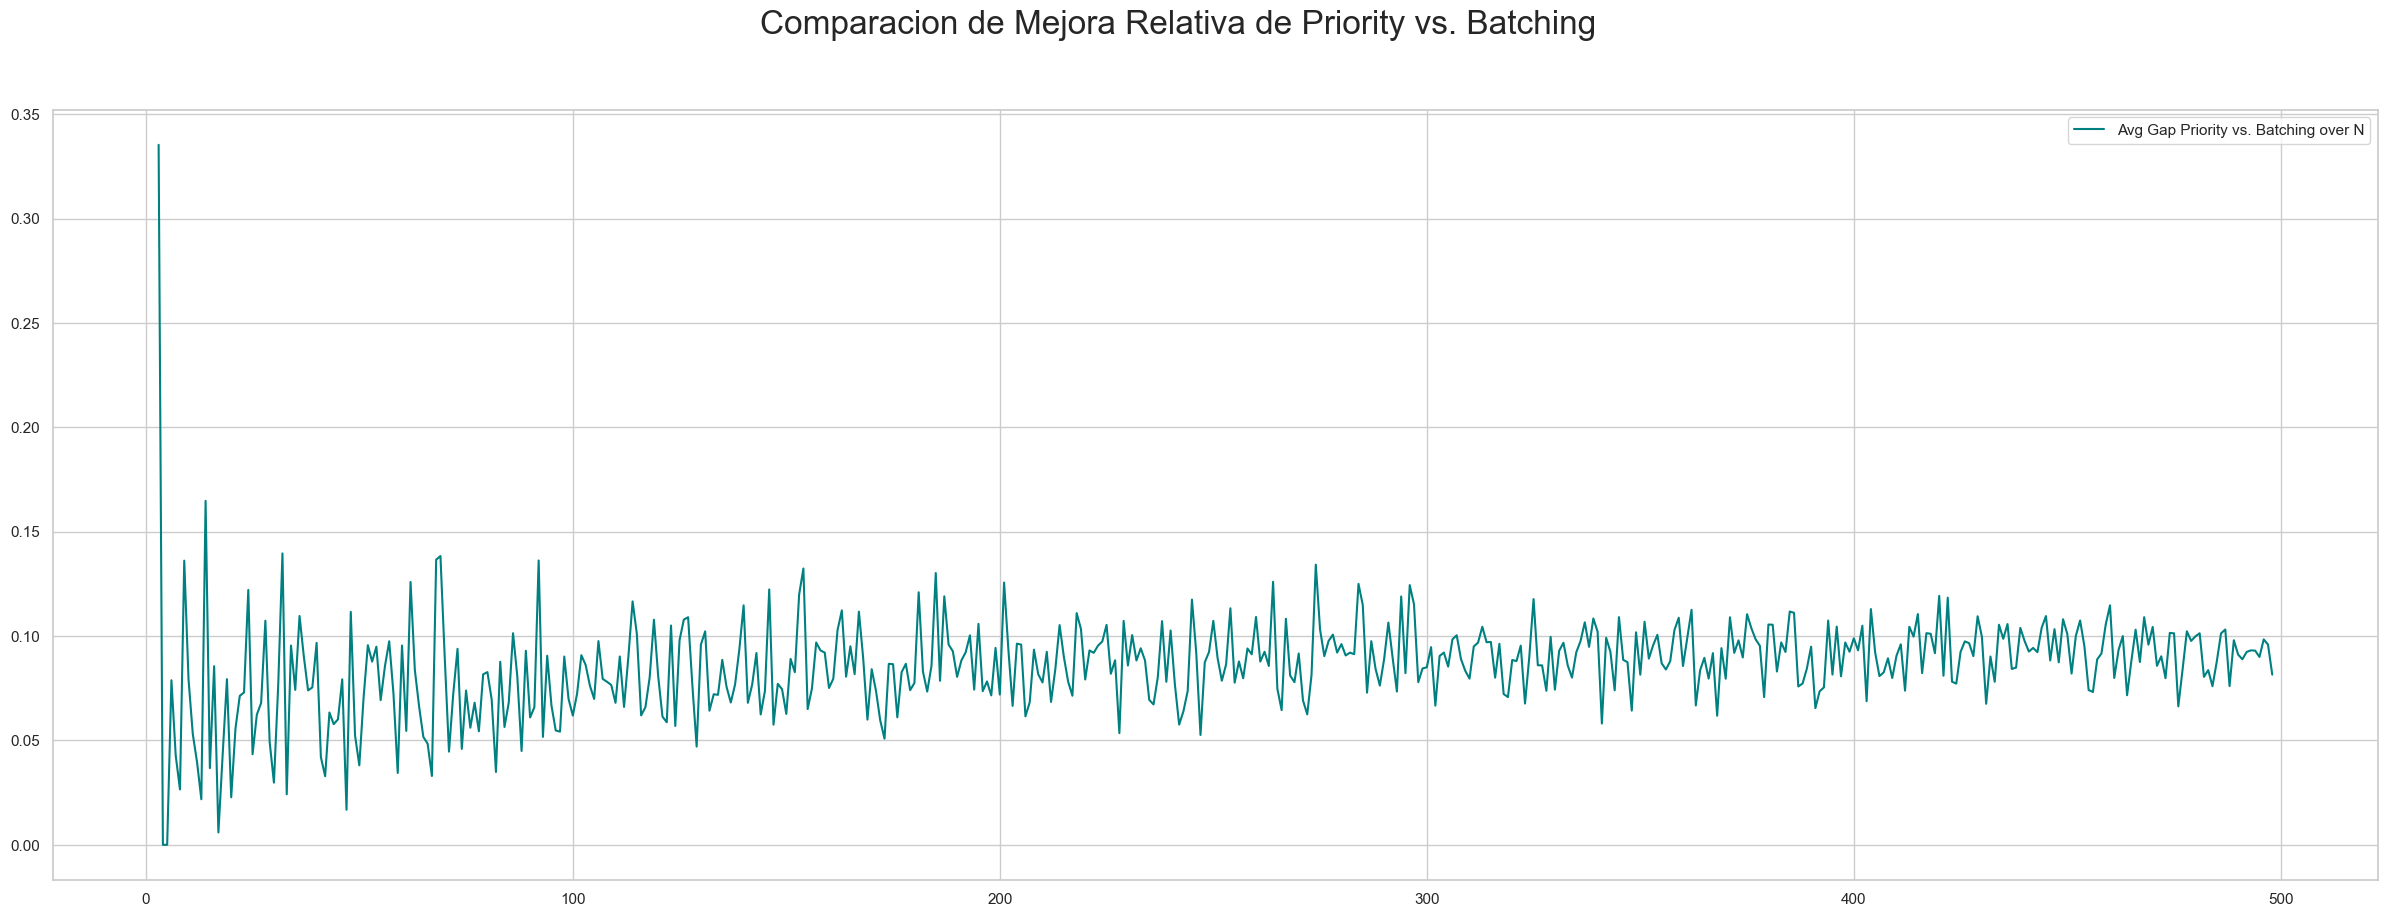

In [60]:
# Mejoras relativas entre soluciones: priority y Batching

# Plot relative improvement

ad_hoc_solutions["gap_priority_min_cost_flow"] = (ad_hoc_solutions["priority_cost"] - ad_hoc_solutions["min_cost_flow_cost"]) / ad_hoc_solutions["min_cost_flow_cost"]

fig, ax = plt.subplots(figsize=(30, 10))

_ = ax.plot(ad_hoc_solutions.groupby("n")[["gap_priority_min_cost_flow"]].mean(),
        color="teal",
        label="Avg Gap Priority vs. Batching over N")

fig.suptitle("Comparacion de Mejora Relativa de Priority vs. Batching", fontsize=24)

_ = ax.legend()



/Users/nacho/opt/anaconda3/envs/coding/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


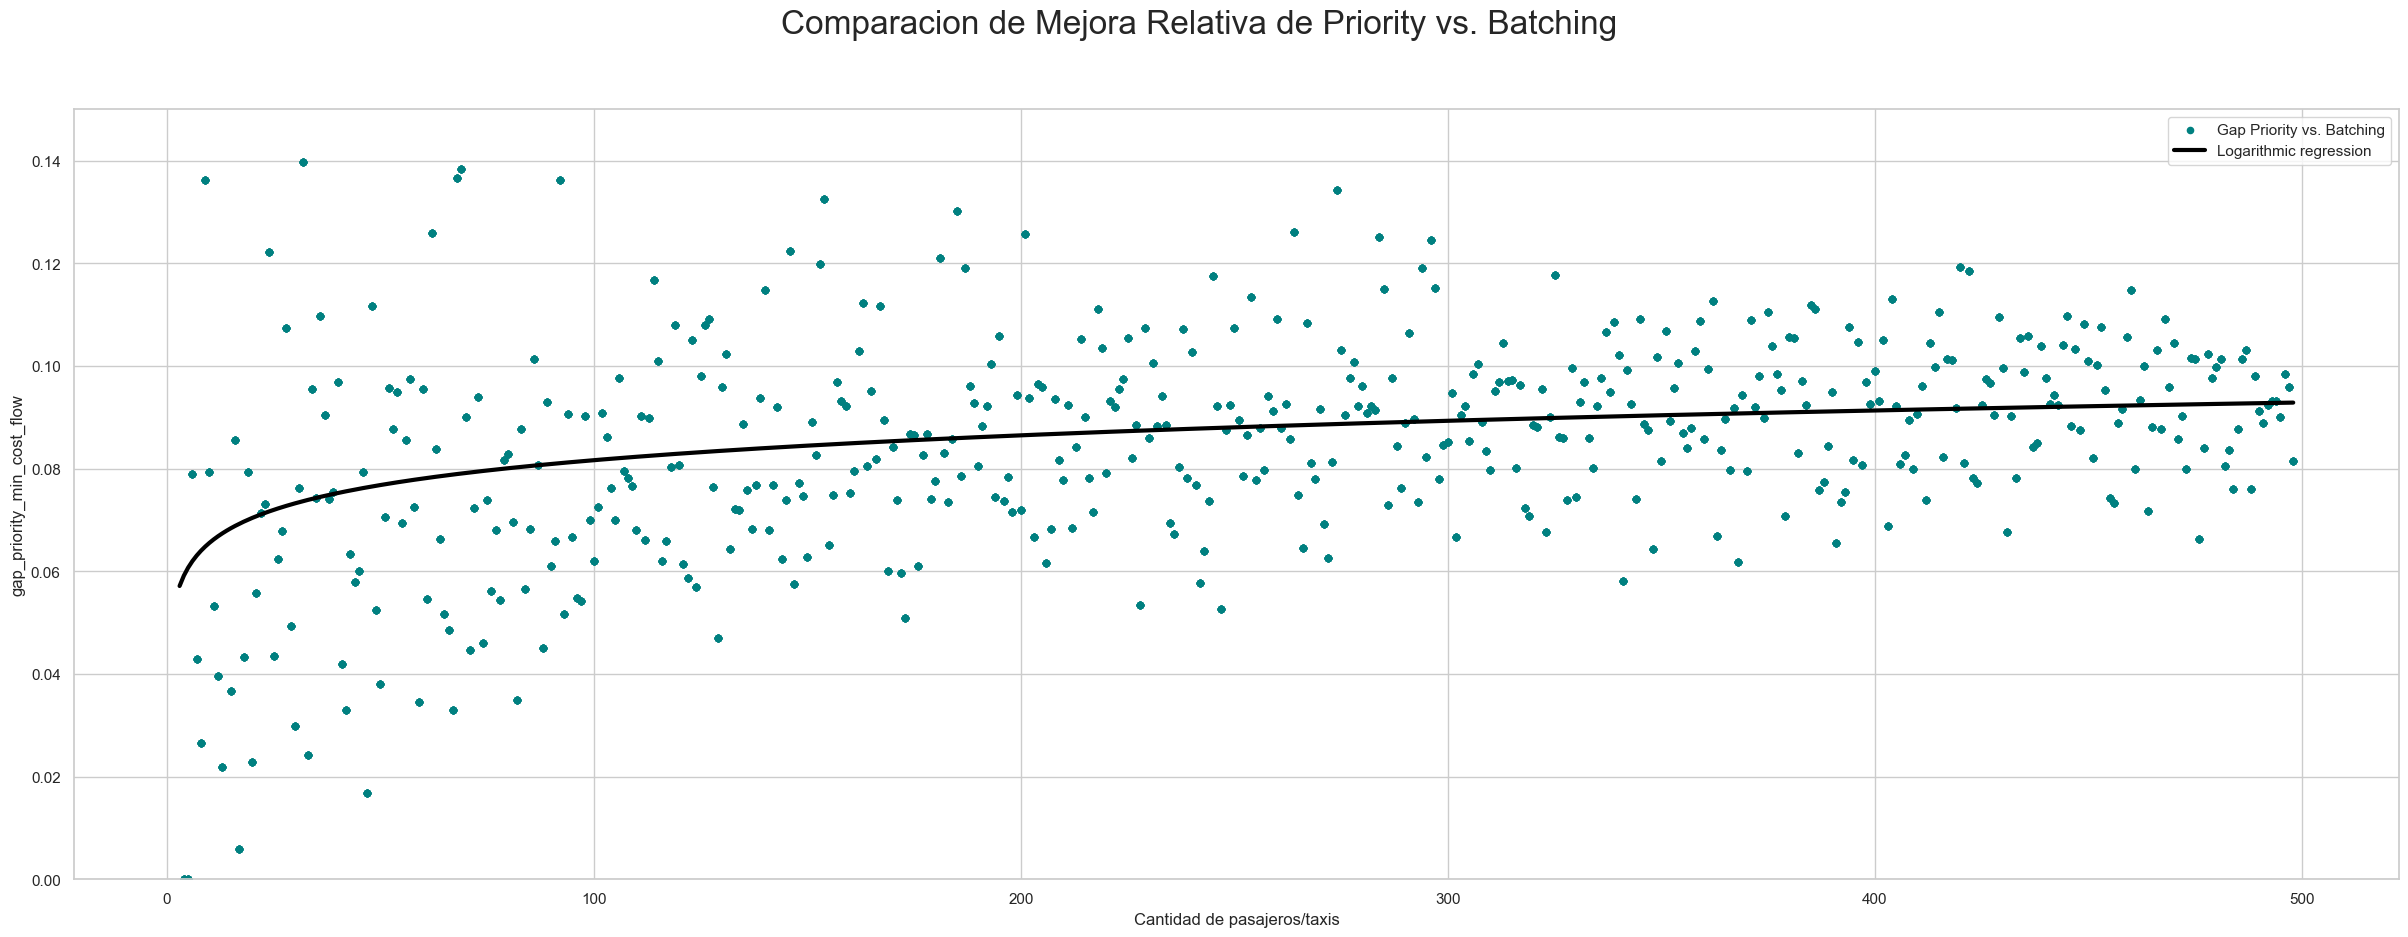

In [61]:
fig, ax = plt.subplots(figsize=(30, 10))

ad_hoc_solutions.plot.scatter(
    x="n", 
    y="gap_priority_min_cost_flow", 
    figsize=(30, 10), 
    color="teal", 
    ax=ax,
    label="Gap Priority vs. Batching"
)

# Logaritmic regression of gap_priority_min_cost_flow


log_reg = np.polyfit(
                np.log(ad_hoc_solutions["n"]), 
                ad_hoc_solutions["gap_priority_min_cost_flow"],
                1
        )
ad_hoc_solutions["log_reg_mcf_pri"] = log_reg[0] * np.log(ad_hoc_solutions["n"]) + log_reg[1]

fake_reg_vals_mcf_pri = ad_hoc_solutions.groupby("n")["log_reg_mcf_pri"].mean()

ax.plot(fake_reg_vals_mcf_pri, color="black", label="Logarithmic regression", linewidth=3)

#ax.set_title("Mejora relativa de Priority vs. Batching")

ax.set_xlabel("Cantidad de pasajeros/taxis")

_ = ax.legend()

#ylim  0-0.15
ax.set_ylim(0, 0.15)

fig.suptitle("Comparacion de Mejora Relativa de Priority vs. Batching", fontsize=24)

fig.savefig("../output/figures/relative_improvement_priority_vs_min_cost_flow.png")

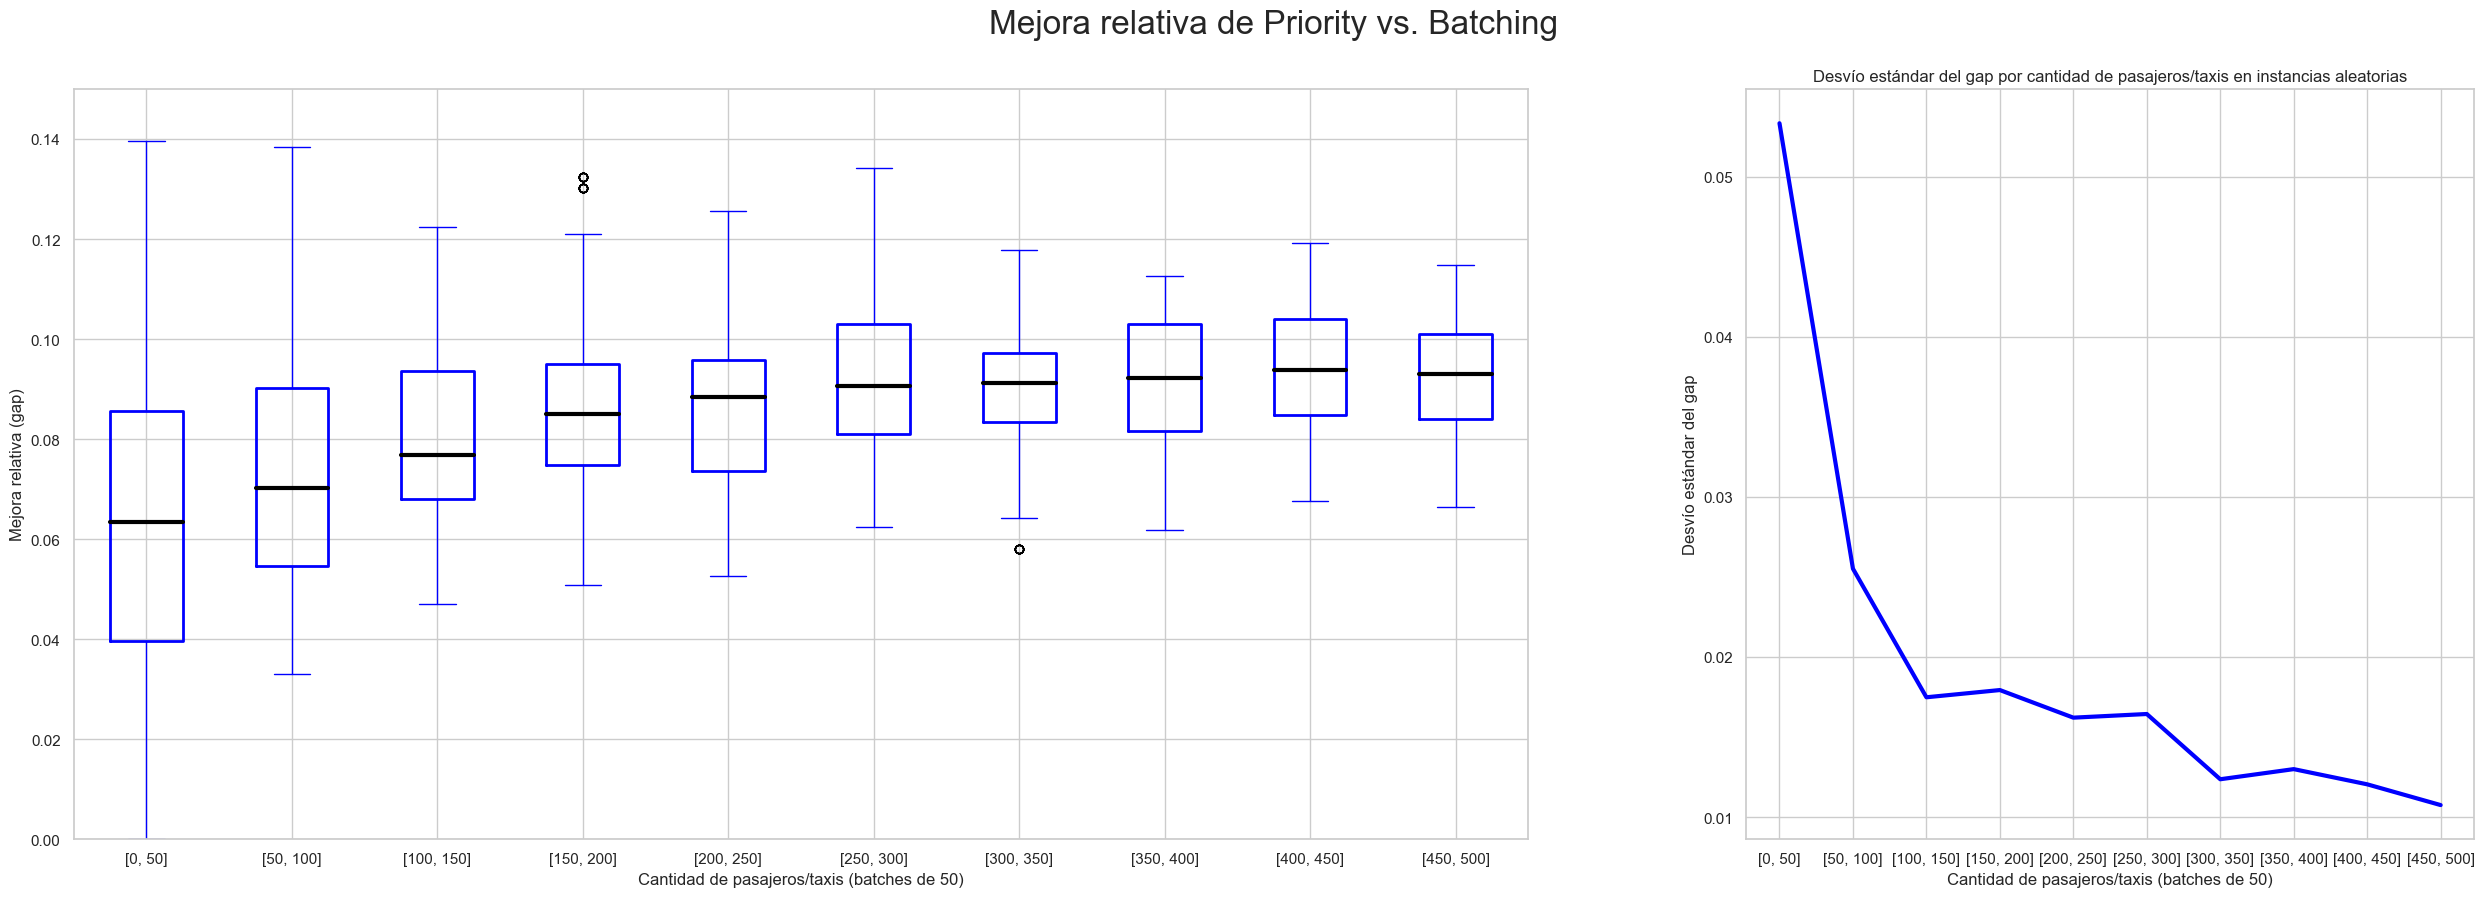

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(30, 10), width_ratios=[2, 1])


ad_hoc_solutions.boxplot(
    column="gap_priority_min_cost_flow",
    by="n_batch", 
    ax=axs[0],
    color="blue",
    boxprops=dict(linestyle='-', linewidth=2, color="blue"),
    medianprops=dict(linestyle='-', linewidth=3, color="black"),
)

#axs[0].set_title("Mejora relativa (gap) por cantidad de pasajeros/taxis en instancias aleatorias")
axs[0].set_title("")
axs[0].set_xlabel("Cantidad de pasajeros/taxis (batches de 50)")
axs[0].set_ylabel("Mejora relativa (gap)")

# Replace xticks to be the batch number intervals of 50 (0, 50, 100, 150, ...)
# Without affecting the scale of the plot

axs[0].set_xticklabels([f"[{i*50}, {(i+1)*50}]"  for i in range(0, 10)])

axs[0].set_ylim(0, 0.15)

ad_hoc_solutions.groupby("n_batch")["gap_priority_min_cost_flow"].std().plot(ax=axs[1], color="blue", linewidth=3)

axs[1].set_title("Desvío estándar del gap por cantidad de pasajeros/taxis en instancias aleatorias")

axs[1].set_xlabel("Cantidad de pasajeros/taxis (batches de 50)")
axs[1].set_ylabel("Desvío estándar del gap")

axs[1].set_xticks(range(0, 10))

axs[1].set_xticklabels([f"[{i*50}, {(i+1)*50}]" for i in range(0, 10)])

fig.suptitle("Mejora relativa de Priority vs. Batching", fontsize=24)

fig.savefig("../output/figures/relative_improvement_priority_vs_min_cost_flow_boxplot.png")

In [63]:
ad_hoc_solutions.groupby("n_batch")["gap_priority_min_cost_flow"].std()

n_batch
0    0.053329
1    0.025517
2    0.017488
3    0.017939
4    0.016216
5    0.016444
6    0.012370
7    0.013002
8    0.012054
9    0.010757
Name: gap_priority_min_cost_flow, dtype: float64

In [64]:
ad_hoc_solutions.groupby("n_batch")["gap_priority_min_cost_flow"].mean()

n_batch
0    0.070359
1    0.074452
2    0.081352
3    0.087215
4    0.086160
5    0.092803
6    0.089518
7    0.091482
8    0.094256
9    0.092019
Name: gap_priority_min_cost_flow, dtype: float64